*texto em itálico*# Introduction
## Phylo - Working with Phylogenetic Trees
## codeml - Working with Selective Pressure
https://biopython.org/wiki/Phylo

This module provides classes, functions and I/O support for working with phylogenetic trees and PAML.

For more complete documentation, see the Phylogenetics chapter of the Biopython Tutorial and the Bio.Phylo API pages generated from the source code. The Phylo cookbook page has more examples of how to use this module, and the PhyloXML page describes how to attach graphical cues and additional information to a tree.

**Clean recombination episodes**


In [1]:
# prompt: import google.colab at drive , drive mount and install bioython and r

import google.colab
from google.colab import drive
# Install R
!apt-get install -y r-base

# Install Biopython (if not already installed in the previous code block)
try:
    import Bio
except ImportError:
    !pip install biopython
    import Bio

!pip install pandas
!pip install fpdf  # Install fpdf if you haven't already
#!pip install --upgrade fpdf #Upgrade to the latest version of fpdf
!pip show matplotlib
!pip install python-docx
#!pip install plotly
!pip install bokeh
!pip show python-docx pandas fpdf2
!pip install --upgrade python-docx


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=0ab4a29a97fa0bcf28390c998931aeba6ca308d78dda8f813951b1afa1465837
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, da

In [2]:
# Change directory (if not already changed in the previous code block)
drive.mount('/content/drive')
%cd /content/drive/MyDrive/hugo2024codeml
# For verifying:
!pwd

Mounted at /content/drive
/content/drive/MyDrive/hugo2024codeml
/content/drive/MyDrive/hugo2024codeml


In [3]:
import logging
import sys
import os
import datetime

# Reconfigure logging to ensure compatibility with Colab
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(stream=sys.stdout, level=logging.INFO, format='%(message)s')
log = logging.getLogger("Depuracao")

# Define auxiliary functions
def get_time_str():
    """Obtém a data e hora atual como string."""
    return datetime.datetime.now().strftime("%m%d%H%M%S")

def get_parent_folder(path, level=1):
    """Retorna o diretório pai até o nível especificado."""
    for _ in range(level):
        path = os.path.dirname(os.path.abspath(path))
    return path

# Check if working directory and functions work
current_dir = os.getcwd()
log.info(f"Current working directory: {current_dir}")

# Example call to auxiliary functions
time_str = get_time_str()
parent_folder = get_parent_folder(current_dir, level=2)

# Log the results
log.info(f"Current Time: {time_str}")
log.info(f"Parent Folder (2 levels up): {parent_folder}")


Current working directory: /content/drive/MyDrive/hugo2024codeml
Current Time: 1217184959
Parent Folder (2 levels up): /content/drive


NumExpr defaulting to 2 threads.
MAIN 1.- Starting MAIN function with scan_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs
pq_line_m7: None
pq_line_m8: None
Error extracting dN/dS from line: dN      dS  N*dN  S*dS
dnds_branch extracted: 4.4292
dnds_branch: 4.4292
pq_line_m7: None
pq_line_m8: None
Error extracting dN/dS from line: dN      dS  N*dN  S*dS
dnds_branch extracted: 4.4292
dnds_branch: 4.4292
pq_line_m7: p =  99.00000  q =  71.45650
pq_line_m8: None
Error extracting dN/dS from line: dN      dS  N*dN  S*dS
dnds_branch extracted: 0.5808
dnds_branch: 0.5808
pq_line_m7: None
pq_line_m8: None
Error extracting dN/dS from line: dN      dS  N*dN  S*dS
dnds_branch extracted: 0.5843
dnds_branch: 0.5843
pq_line_m7: None
pq_line_m8: None
Error extracting dN/dS from line: dN      dS  N*dN  S*dS
dnds_branch extracted: 0.2642
dnds_branch: 0.2642
pq_line_m7: None
pq_line_m8: p0 =   0.77828  p =   0.00500 q =  85.10110 (p1 =   0.22172) w =  19.97621
Error extracting dN/dS from line: 

<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


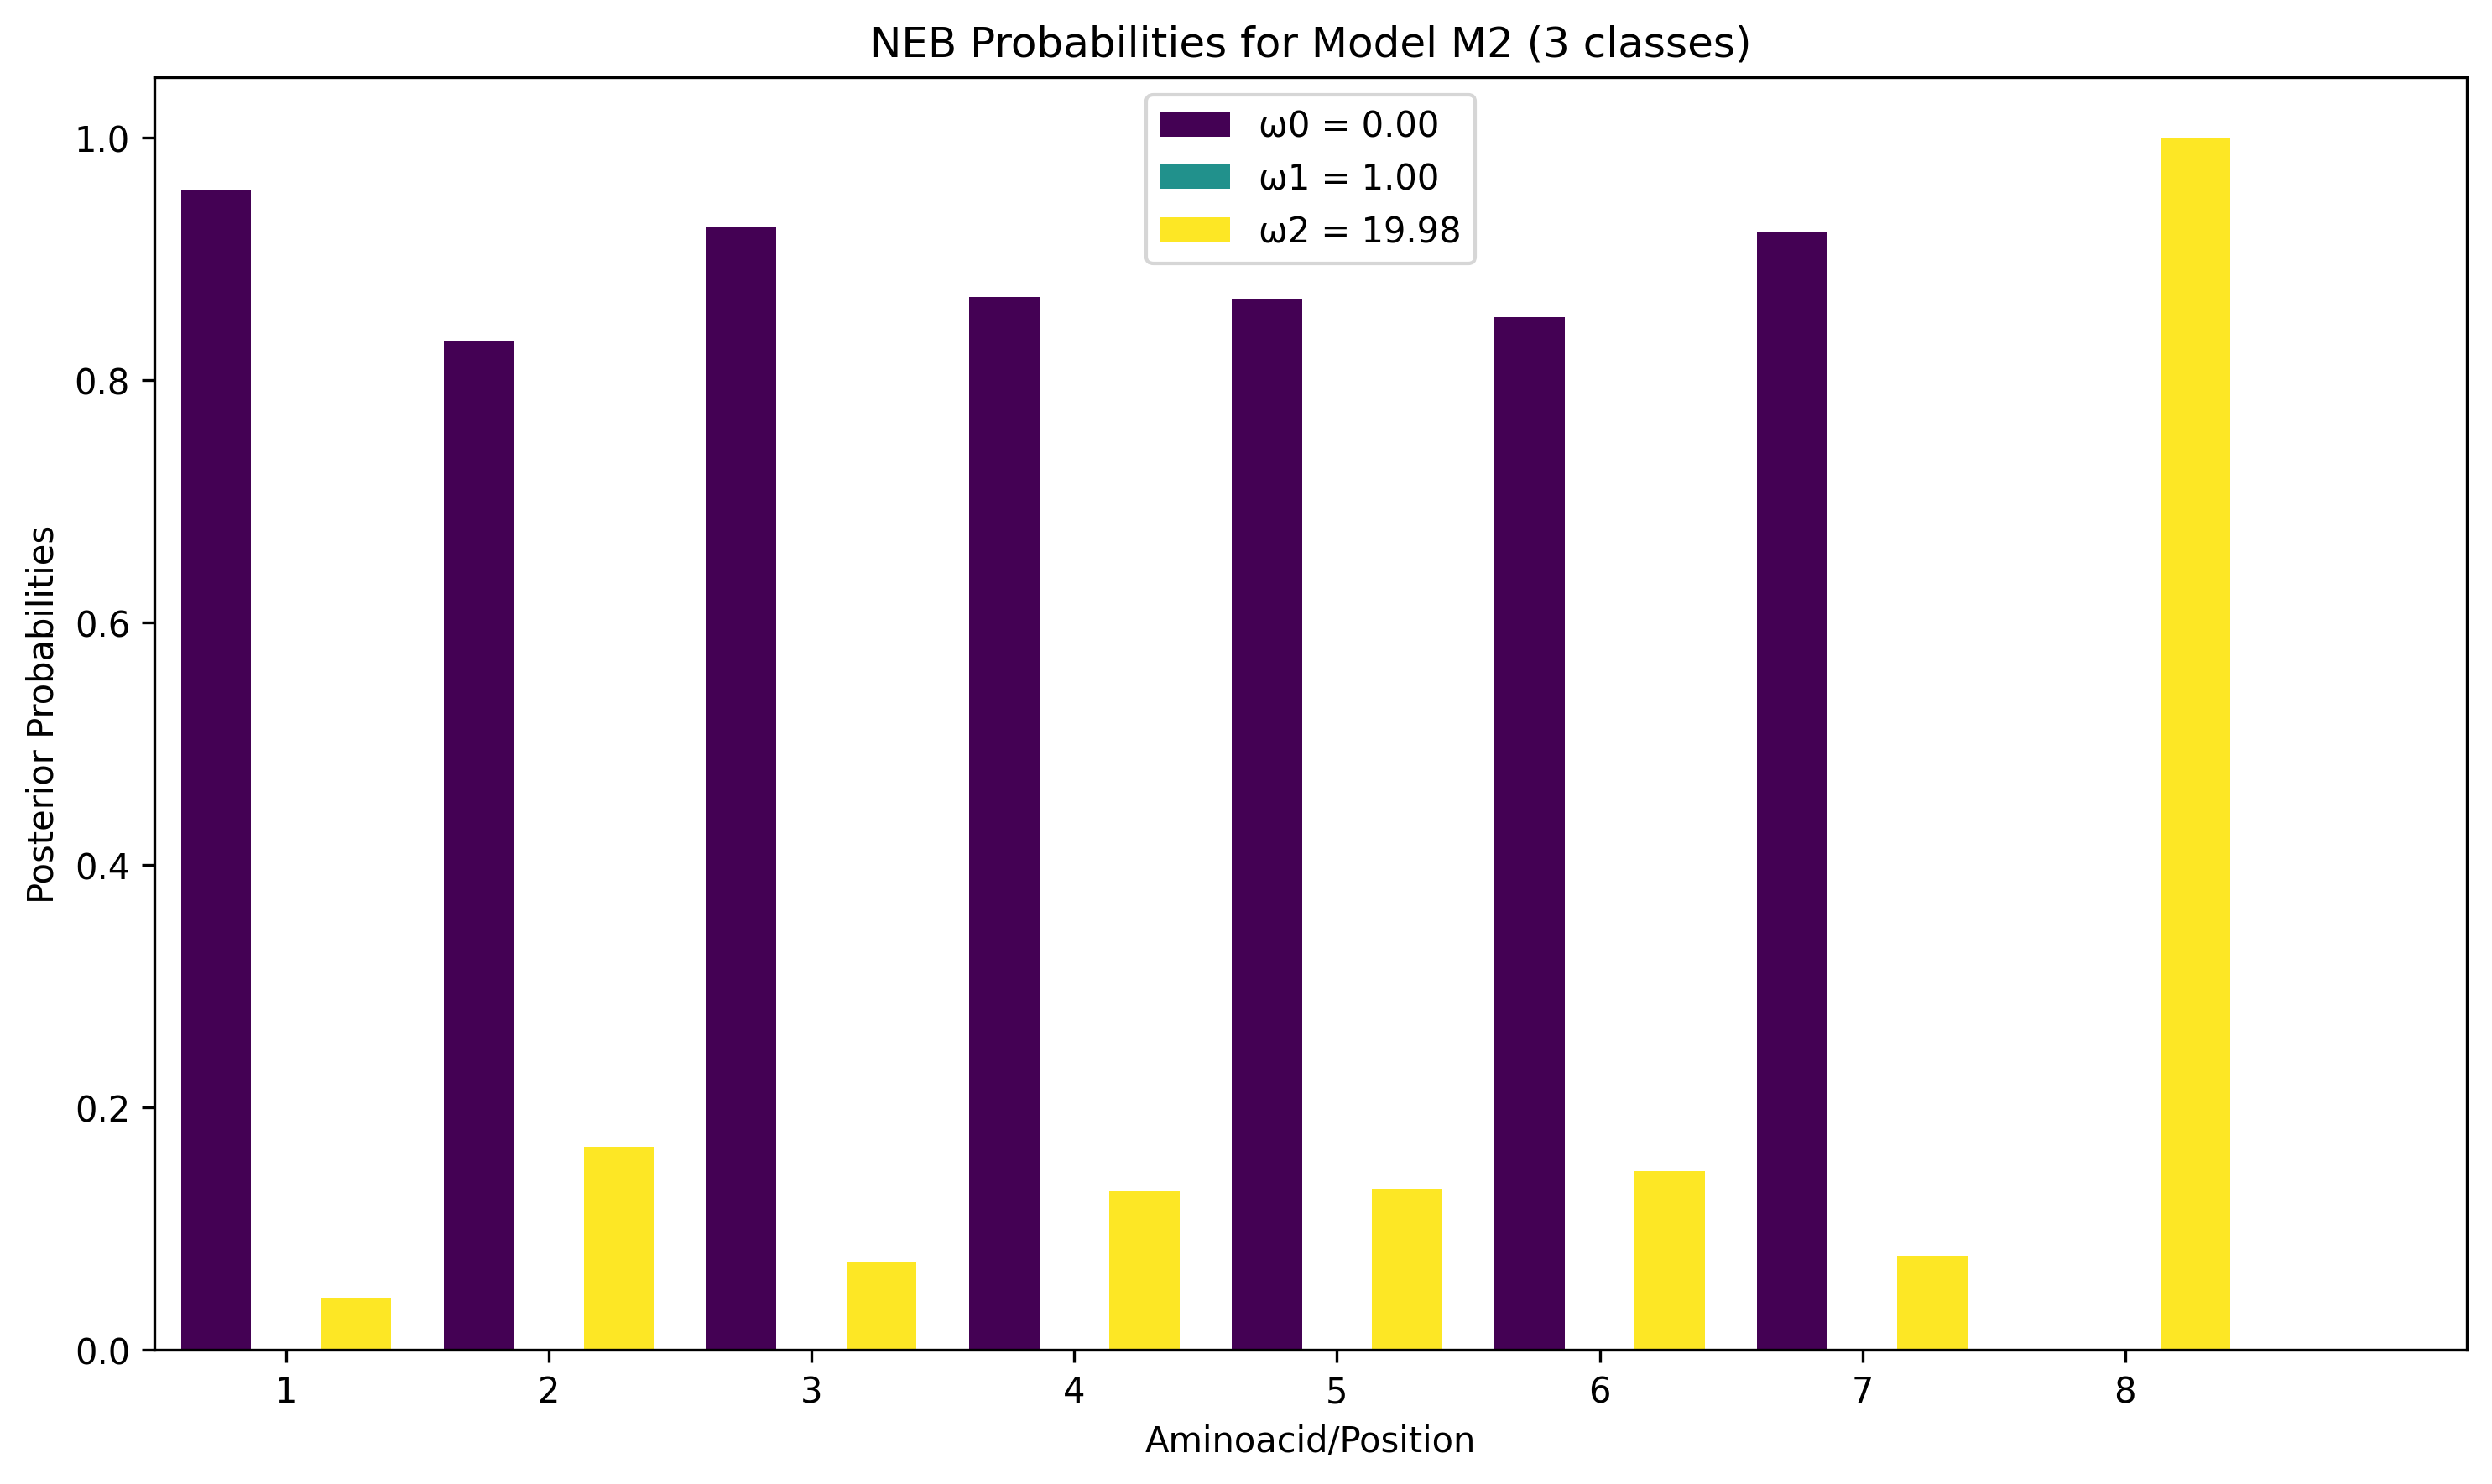

<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


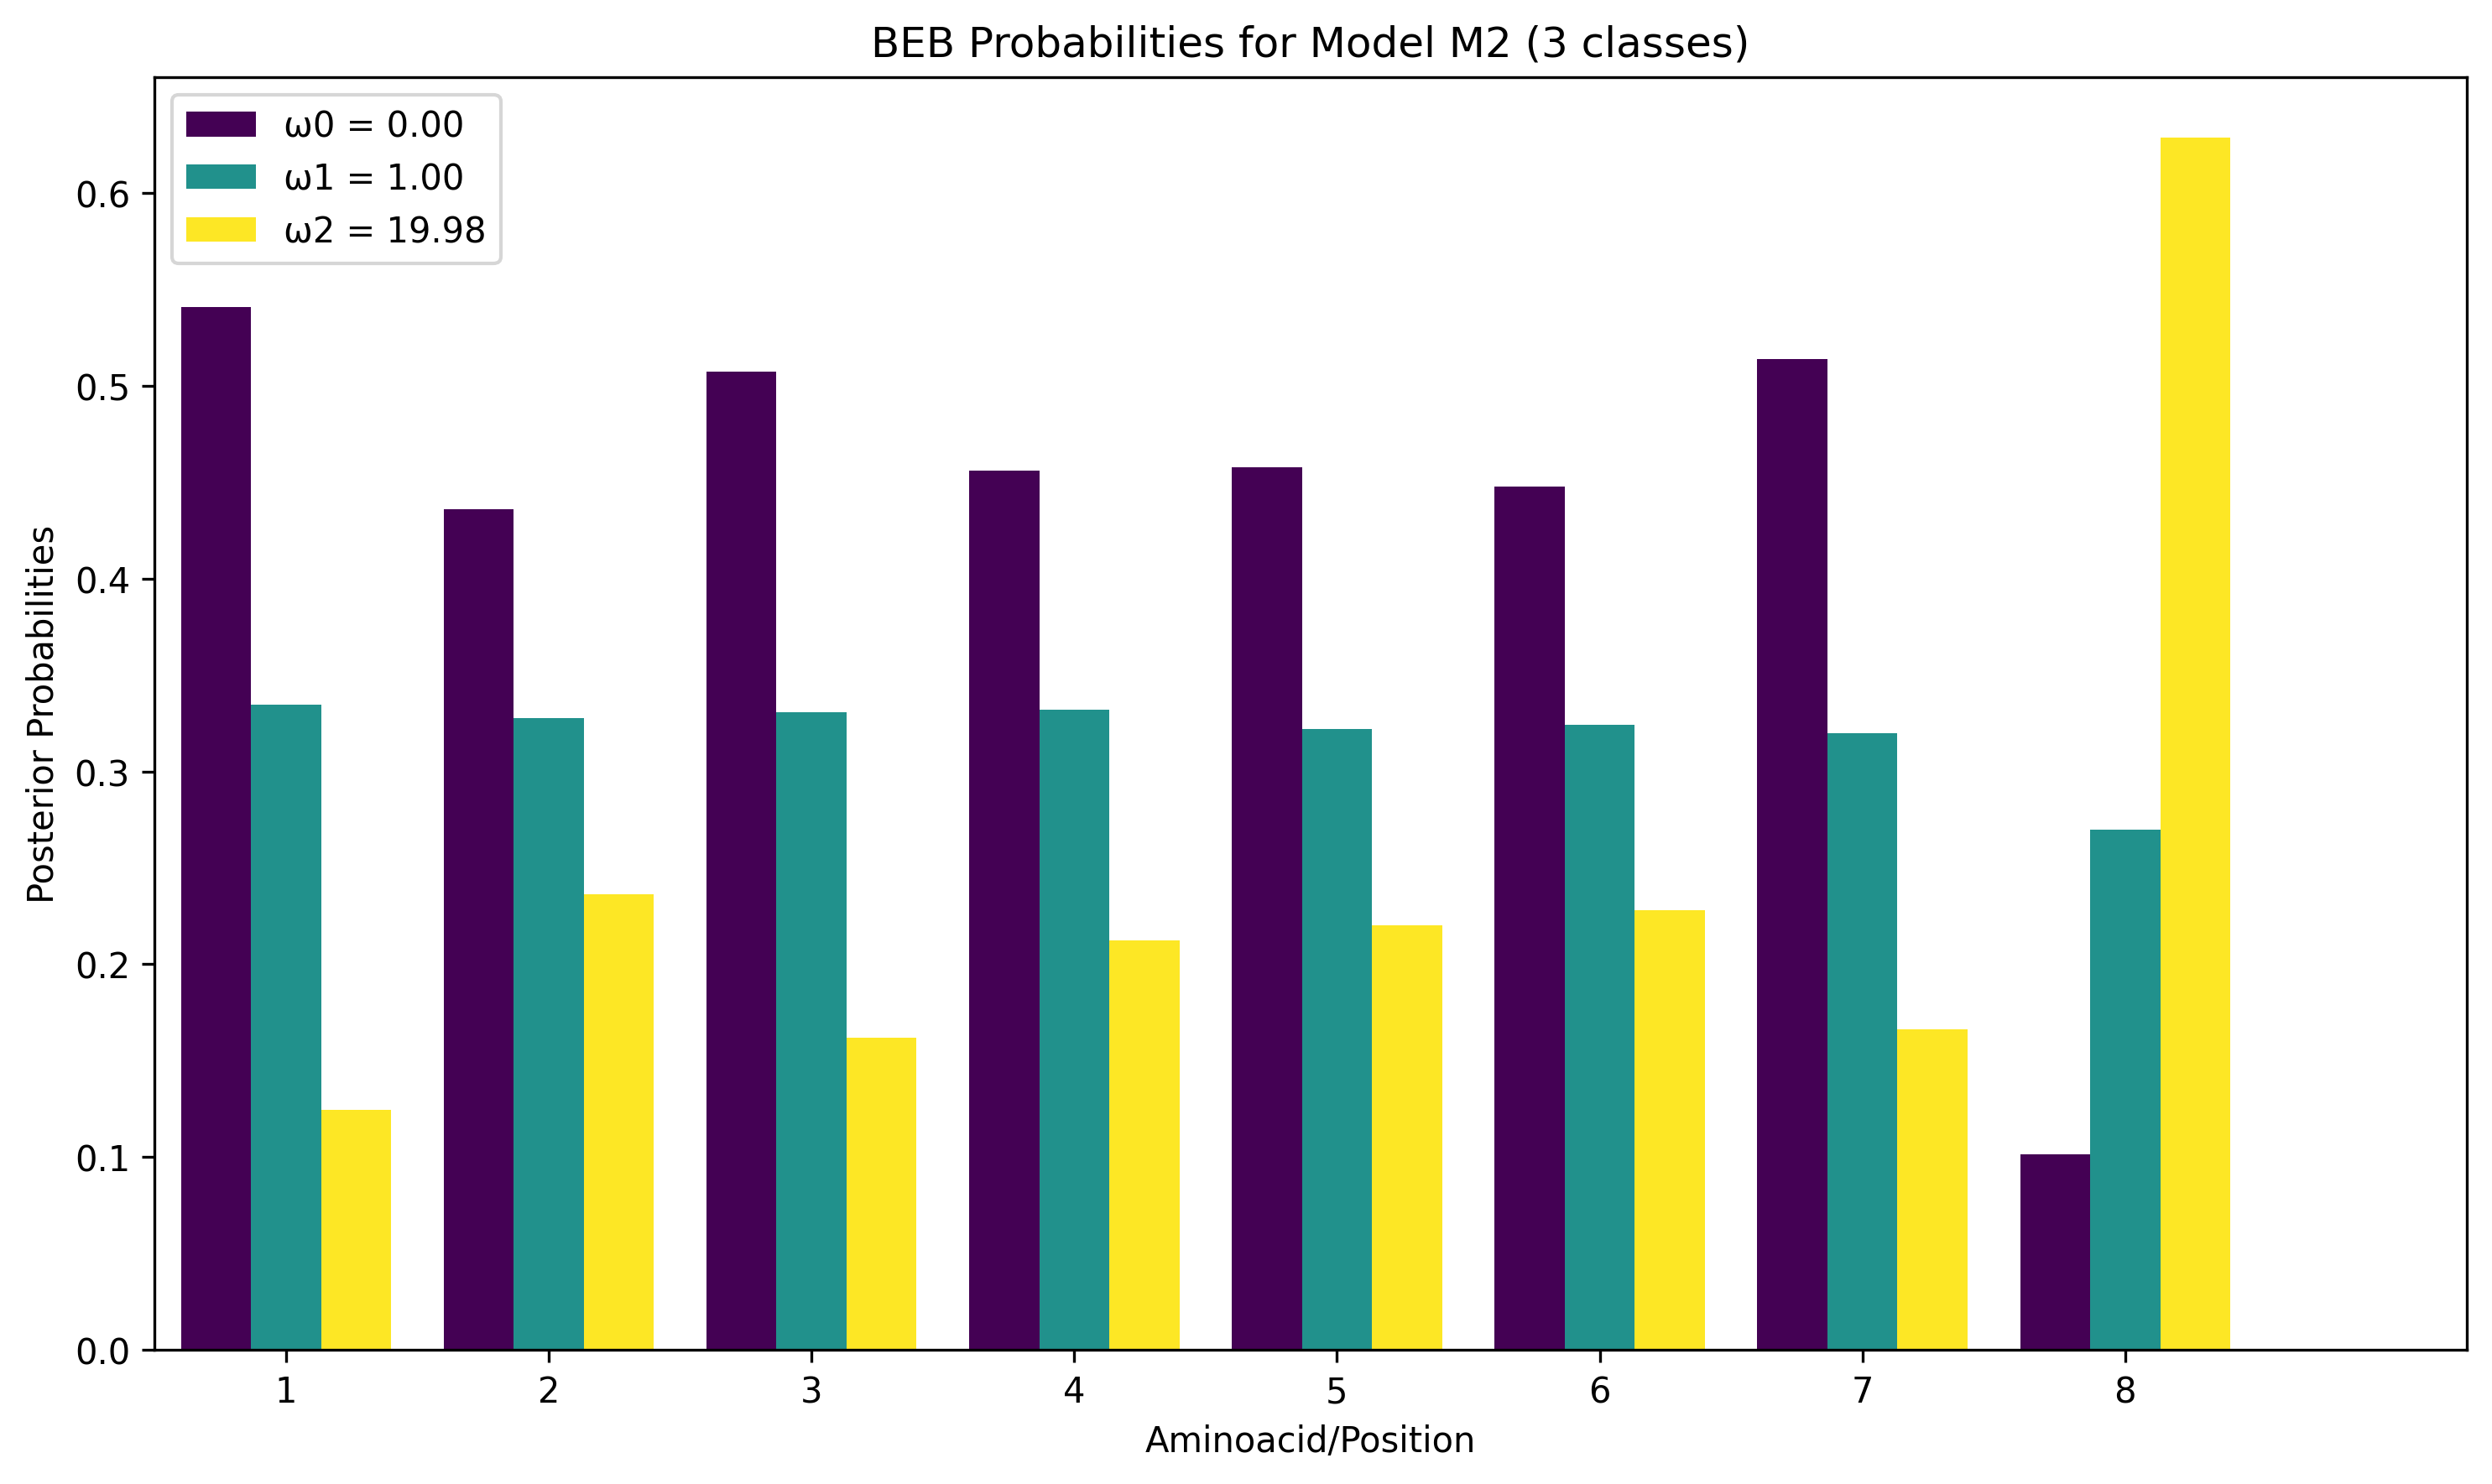

Inside log() method
result_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M3/M3_test.results.txt
lnl: -38.702839
rst_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M3/rst
w: [0.0, 0.0, 19.97626]
p: [0.0, 0.77827, 0.22173]
kappa: 999.0
omega: None
np: 15.0
dnds_branch: 4.4292
----------------------------------------
NEB data: [[1, 'T', 0.0, 0.95686, 0.04314, '(', '2)', 0.862, 0.043], [2, 'S', 0.0, 0.83214, 0.16786, '(', '2)', 3.353, 0.168], [3, 'C', 0.0, 0.92694, 0.07306, '(', '2)', 1.459, 0.073], [4, 'D', 0.0, 0.86882, 0.13118, '(', '2)', 2.62, 0.131], [5, 'A', 0.0, 0.86706, 0.13294, '(', '2)', 2.656, 0.133], [6, 'Y', 0.0, 0.85215, 0.14785, '(', '2)', 2.953, 0.148], [7, 'V', 0.0, 0.92239, 0.07761, '(', '2)', 1.55, 0.078], [8, '-', 0.0, 0.0, 1.0, '(', '3)', 19.976, 1.0]]
neb_positive_selection_data data: [[8, '-', '1.000**', 19.976]]
BEB data: []
beb_positive_selection_data data: []
----------------------------------------


<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


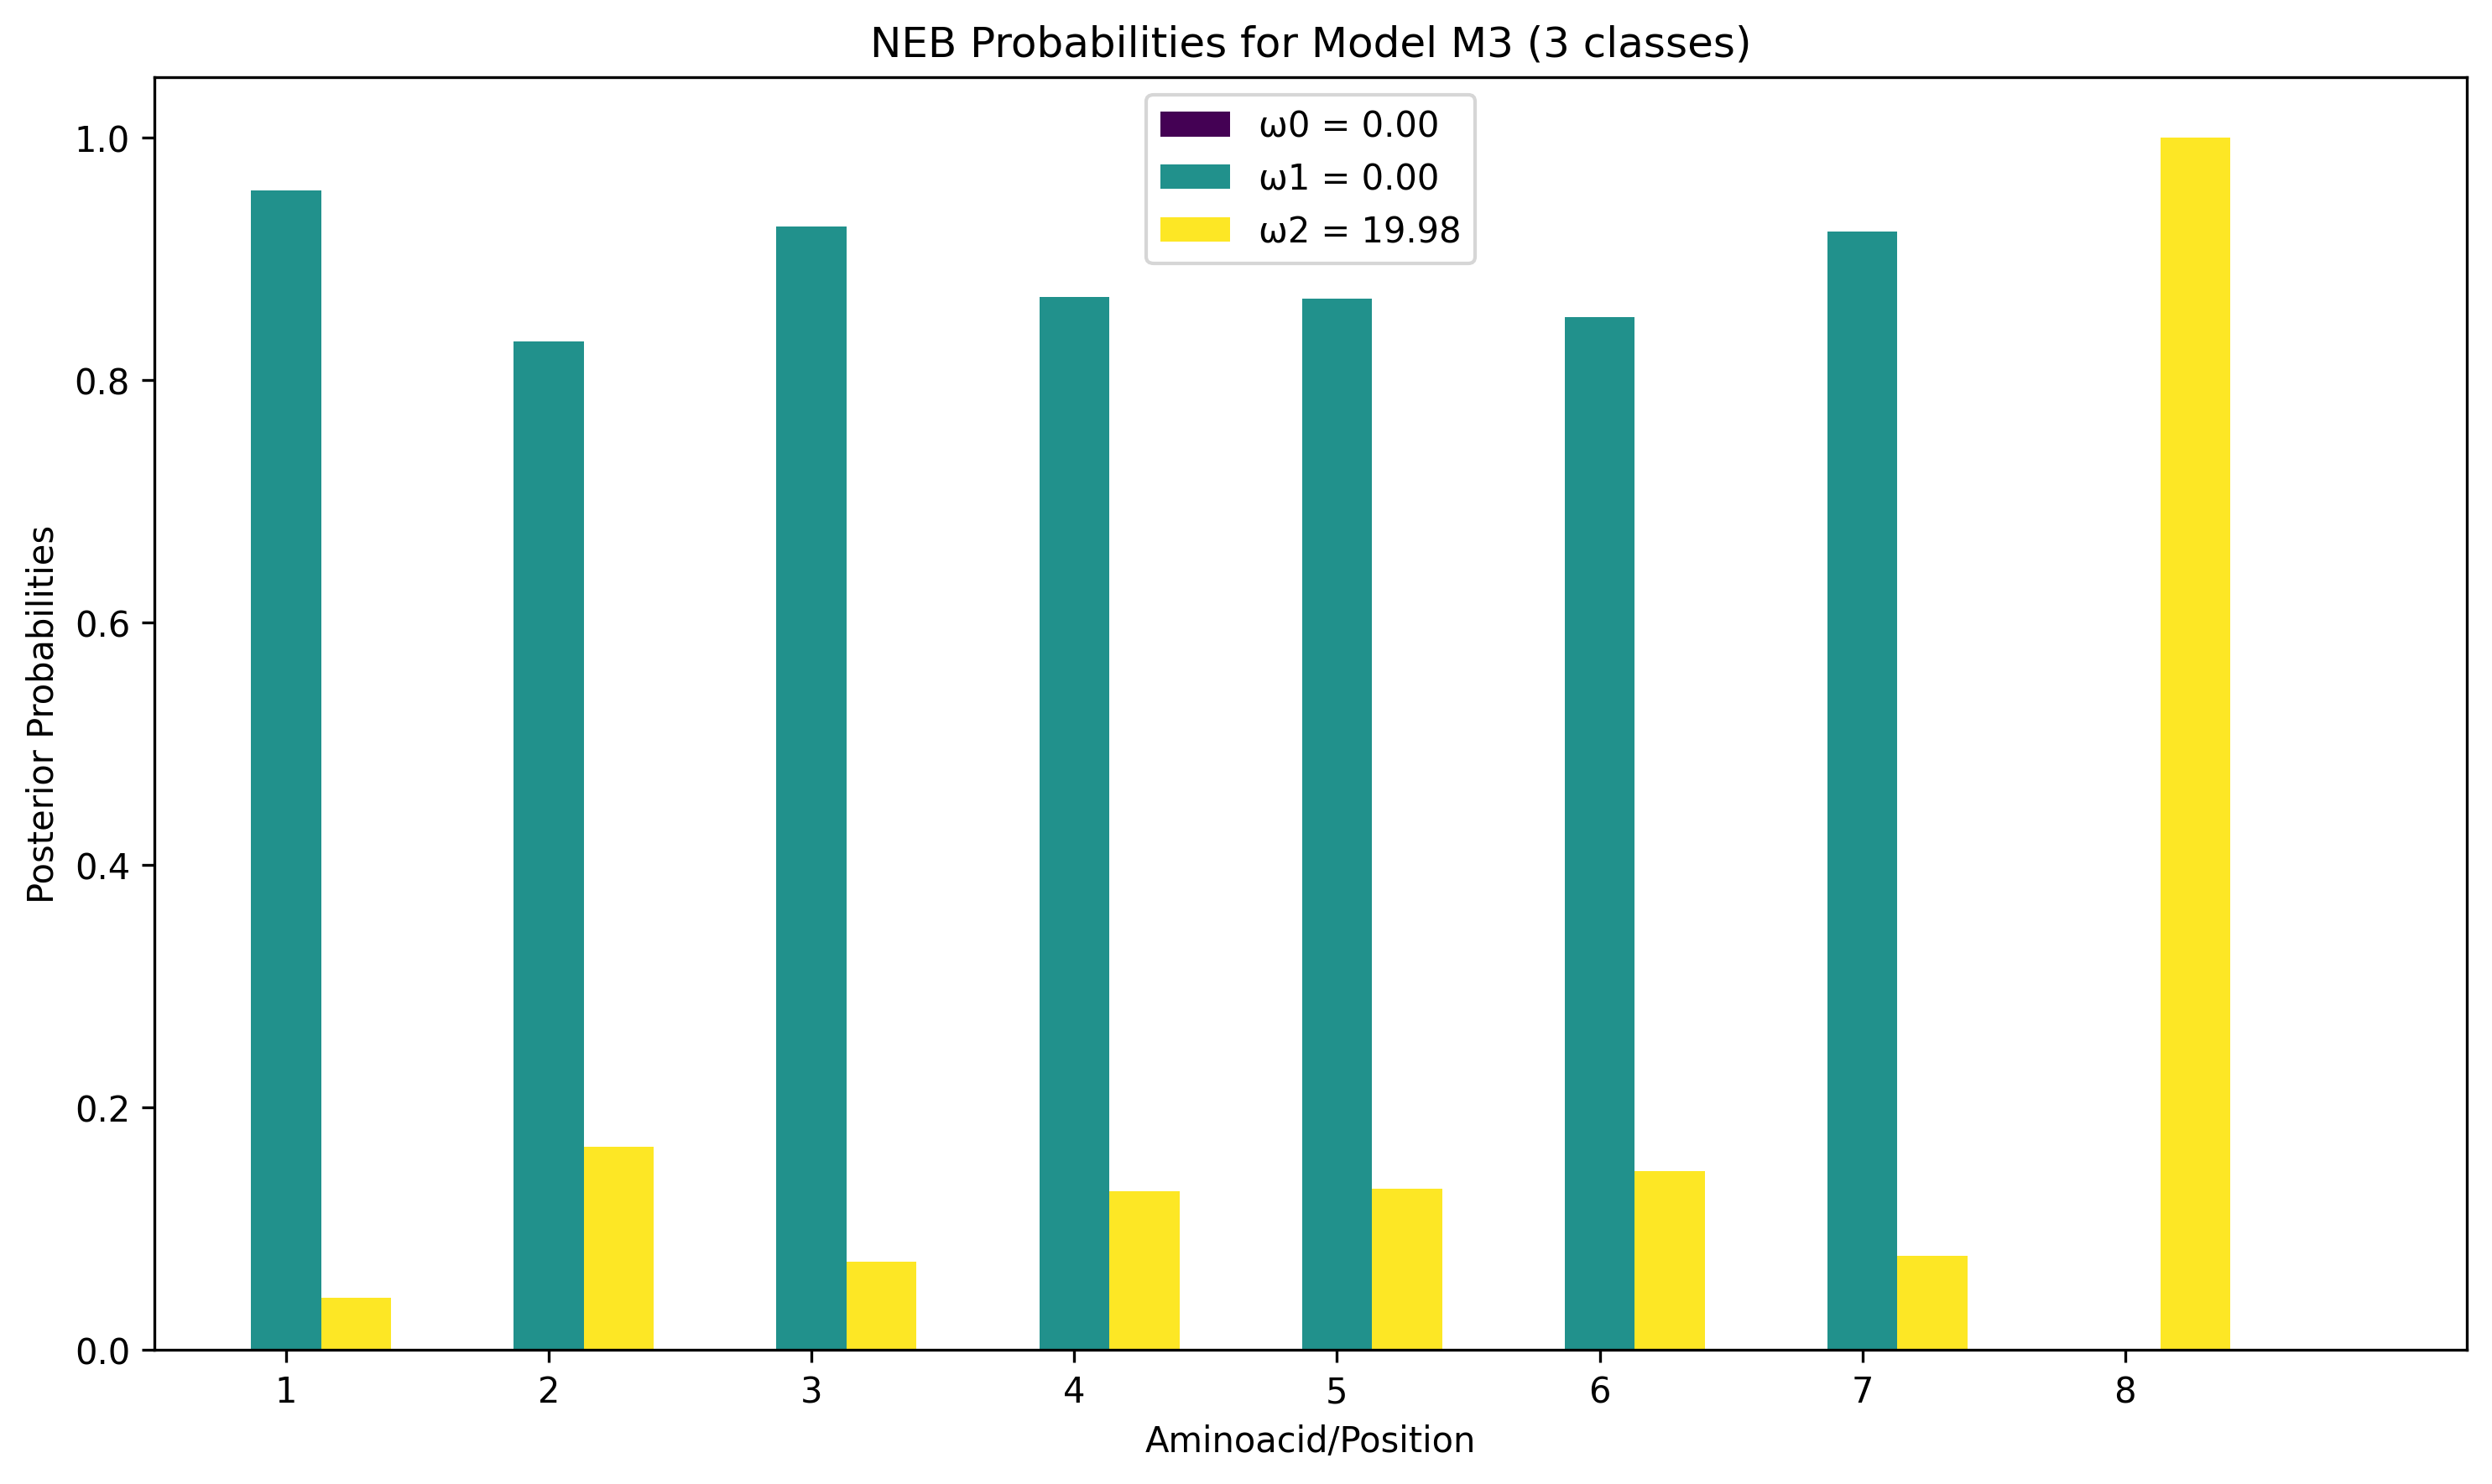

Error: Invalid input for make_chart (BEB, M3)
Inside log() method
result_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M7/M7_test.results.txt
lnl: -40.368584
rst_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M7/rst
w: [0.51825, 0.54161, 0.55546, 0.56648, 0.57635, 0.58586, 0.59564, 0.60647, 0.61993, 0.64226]
p: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
kappa: 999.0
omega: None
np: 12.0
dnds_branch: 0.5808
----------------------------------------
NEB data: [[1, 'T', 0.10425, 0.10262, 0.10167, 0.10092, 0.10026, 0.09963, 0.09898, 0.09827, 0.09741, 0.09599, '(', '1)', 0.58], [2, 'S', 0.10096, 0.1006, 0.10038, 0.10021, 0.10006, 0.09992, 0.09977, 0.09961, 0.09941, 0.09908, '(', '1)', 0.581], [3, 'C', 0.10332, 0.10205, 0.10131, 0.10072, 0.1002, 0.09971, 0.0992, 0.09865, 0.09797, 0.09686, '(', '1)', 0.58], [4, 'D', 0.10146, 0.10091, 0.10058, 0.10032, 0.10009, 0.09987, 0.09965, 0.0994, 0.0991, 0.0986, '(', '1)', 0.581], [5, 'A', 0.10201, 0.10123, 0.10078, 0.10043

<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


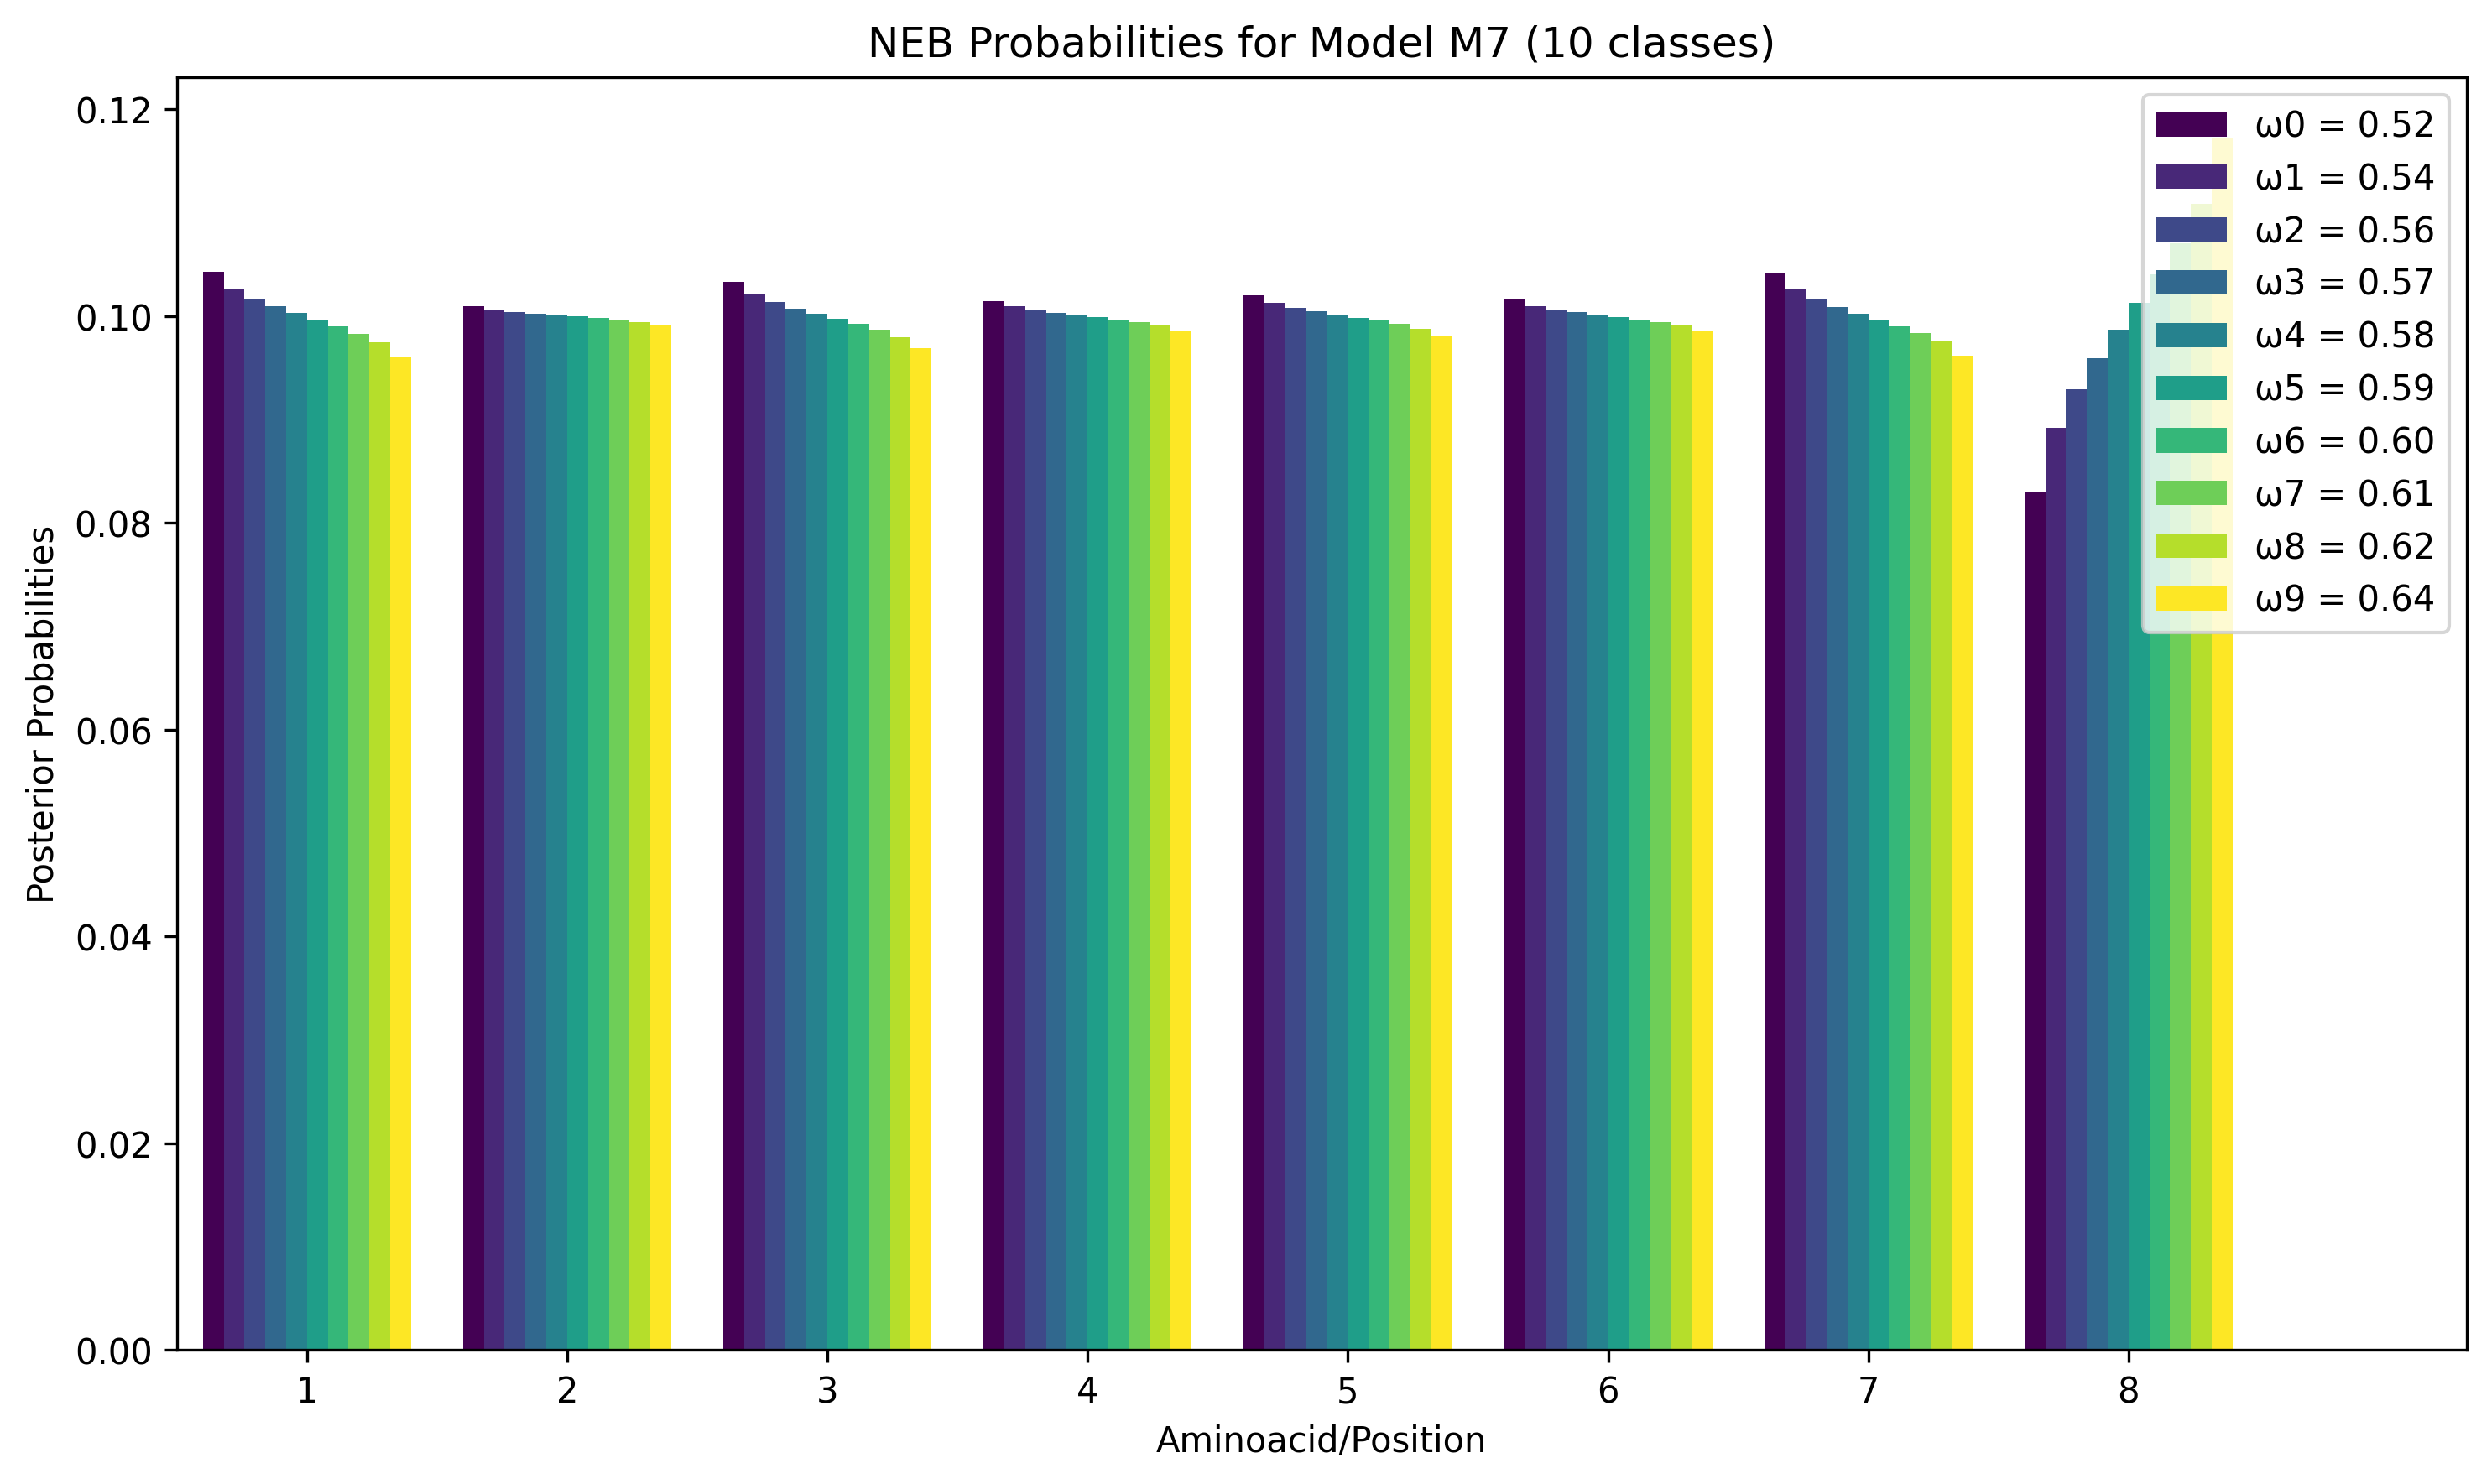

Error: Invalid input for make_chart (BEB, M7)
Inside log() method
result_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M0/M0_test.results.txt
lnl: -40.371435
rst_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M0/rst
w: []
p: []
kappa: 999.0
omega: 0.58425
np: 11.0
dnds_branch: 0.5843
----------------------------------------
NEB data: []
neb_positive_selection_data data: []
BEB data: []
beb_positive_selection_data data: []
----------------------------------------
Error: Invalid input for make_chart (NEB, M0)
Error: Invalid input for make_chart (BEB, M0)
Inside log() method
result_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M1/M1_test.results.txt
lnl: -39.368253
rst_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M1/rst
w: [0.0, 1.0]
p: [0.73584, 0.26416]
kappa: 999.0
omega: None
np: 12.0
dnds_branch: 0.2642
----------------------------------------
NEB data: [[1, 'T', 0.90291, 0.09709, '(', '1)', 0.097], [2, 'S', 0.78642, 0.21358, '(', '1)',

<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


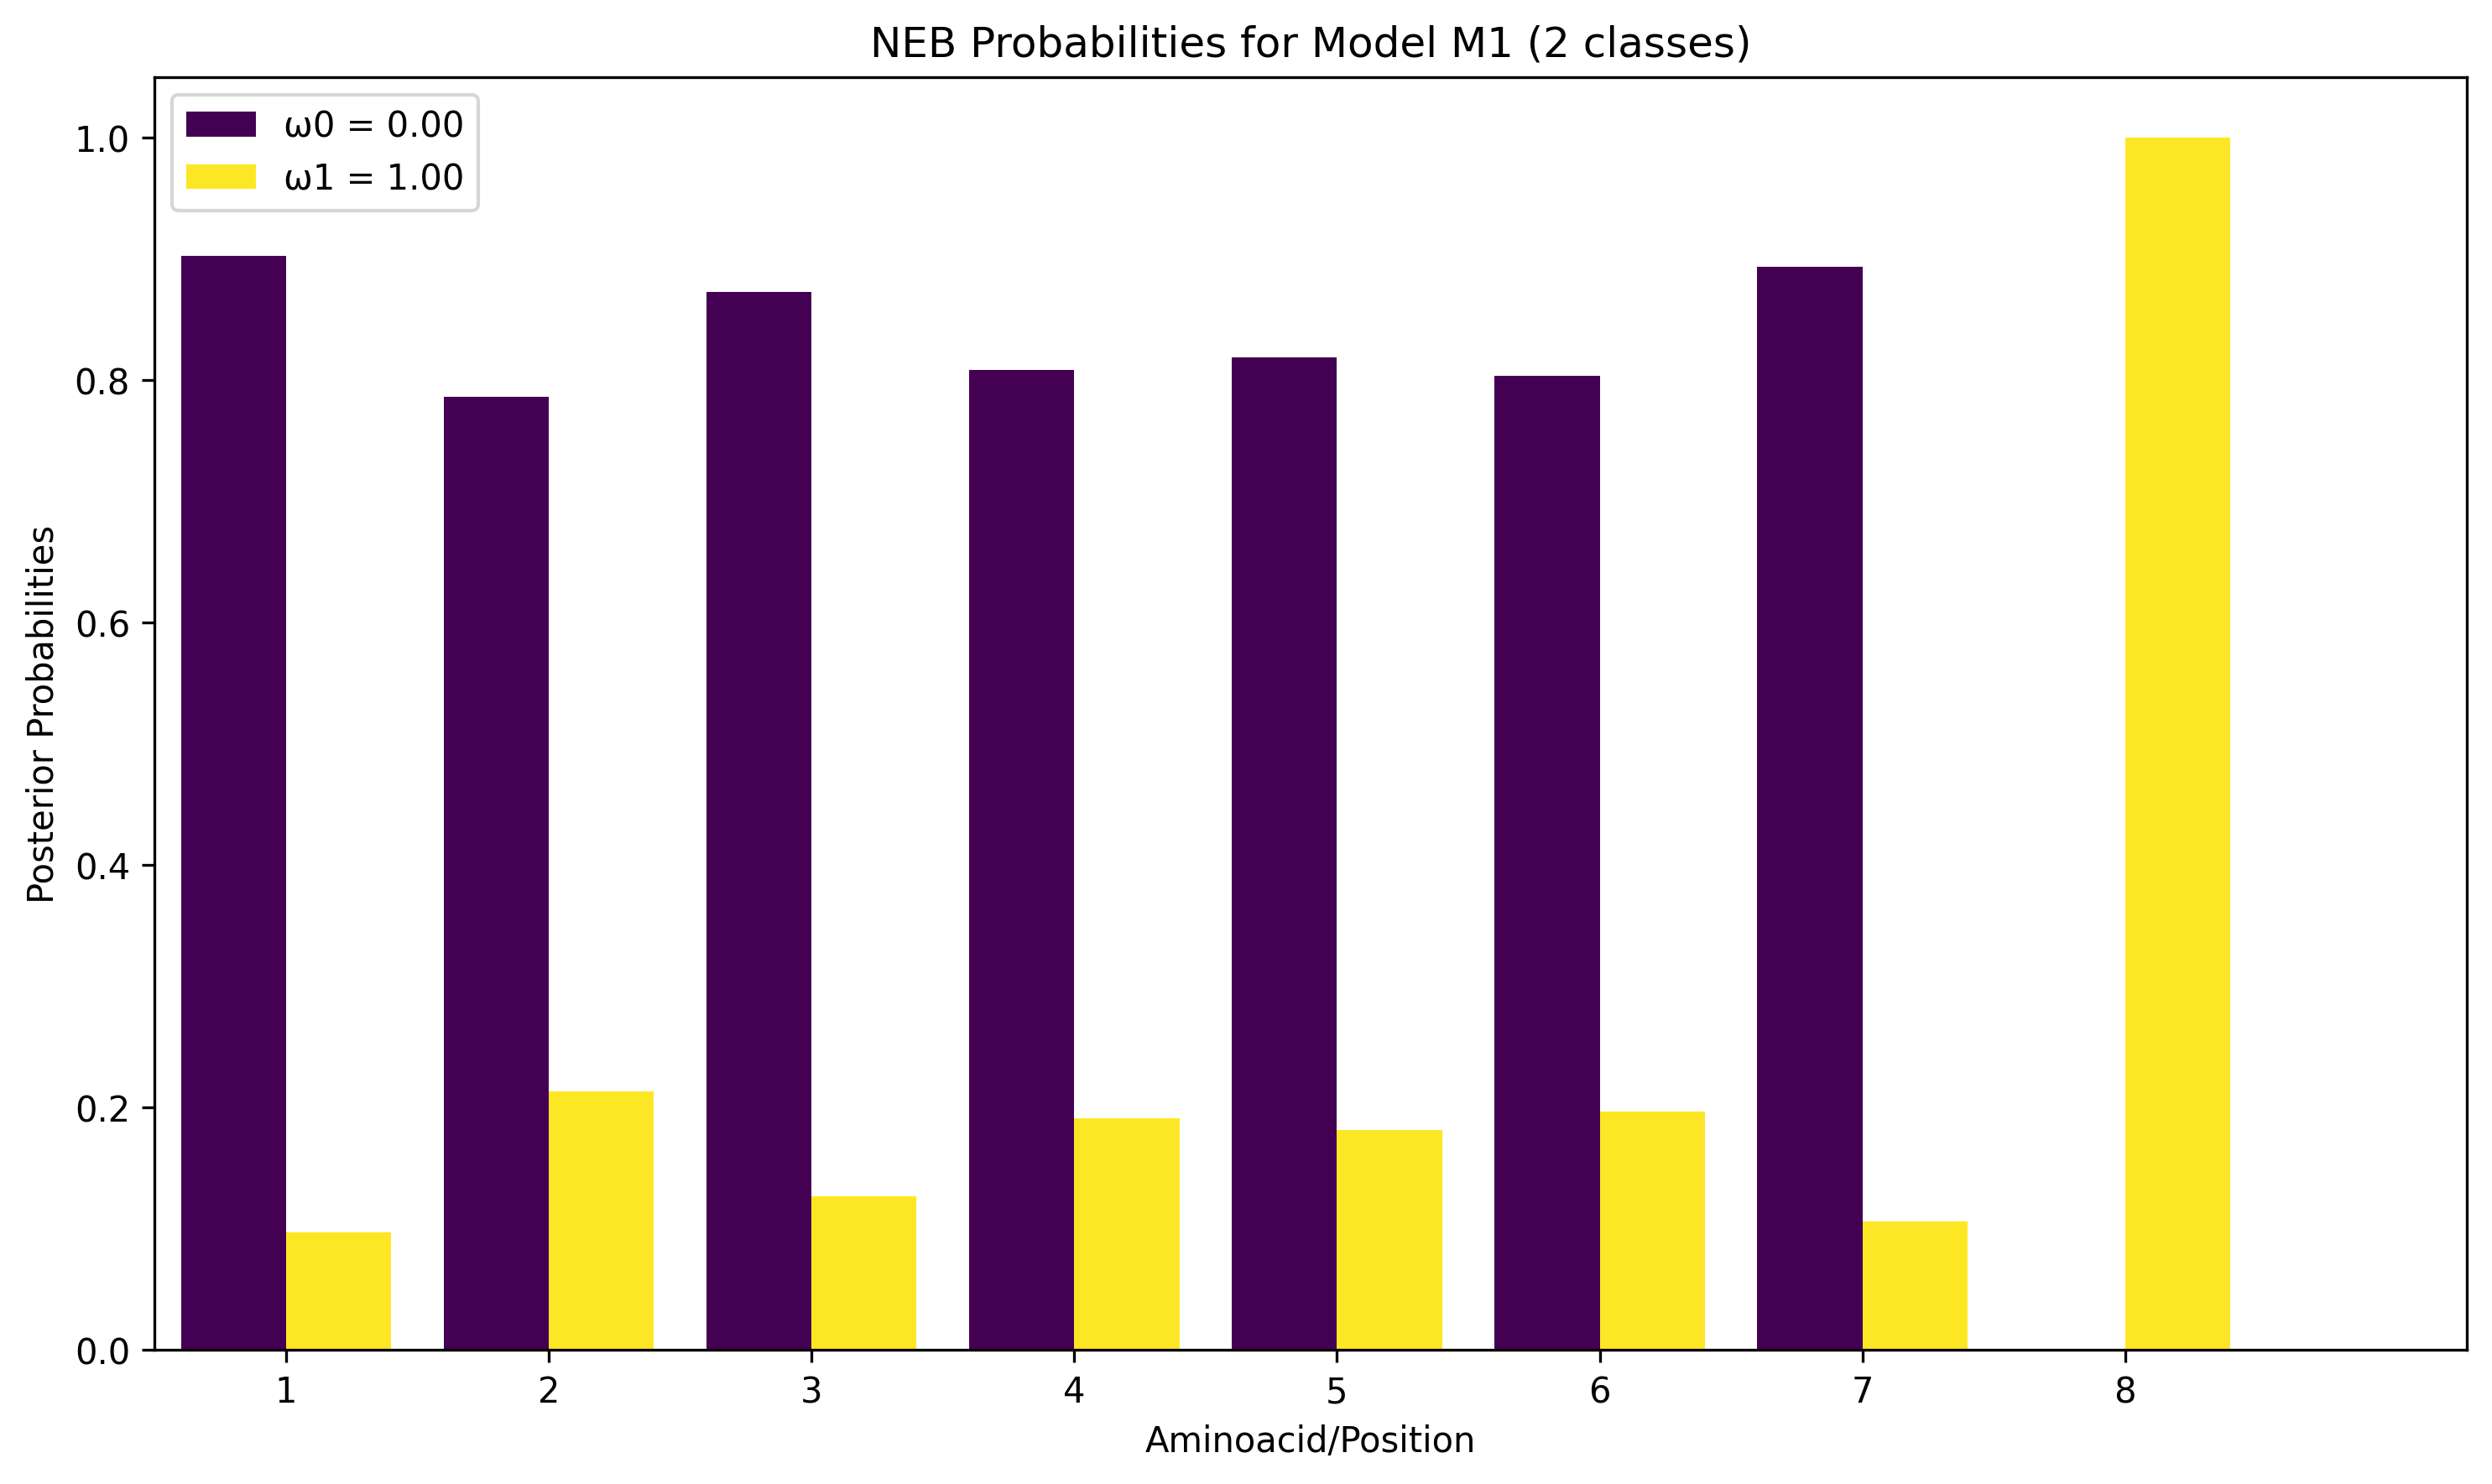

Error: Invalid input for make_chart (BEB, M1)
Inside log() method
result_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M8/M8_test.results.txt
lnl: -38.702836
rst_path: /content/drive/MyDrive/hugo2024codeml/teste/outputs/M8/rst
w: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.97621]
p: [0.07783, 0.07783, 0.07783, 0.07783, 0.07783, 0.07783, 0.07783, 0.07783, 0.07783, 0.07783, 0.22172]
kappa: 999.0
omega: None
np: 14.0
dnds_branch: 4.4292
----------------------------------------
NEB data: [[1, 'T', 0.09569, 0.09569, 0.09569, 0.09569, 0.09569, 0.09569, 0.09569, 0.09569, 0.09569, 0.09569, 0.04314, '(', '1)', 0.862, 0.043], [2, 'S', 0.08321, 0.08321, 0.08321, 0.08321, 0.08321, 0.08321, 0.08321, 0.08321, 0.08321, 0.08321, 0.16786, '(11)', 3.353, 0.168], [3, 'C', 0.09269, 0.09269, 0.09269, 0.09269, 0.09269, 0.09269, 0.09269, 0.09269, 0.09269, 0.09269, 0.07306, '(', '2)', 1.459, 0.073], [4, 'D', 0.08688, 0.08688, 0.08688, 0.08688, 0.08688, 0.08688, 0.08688, 0.08688, 0.08688,

<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


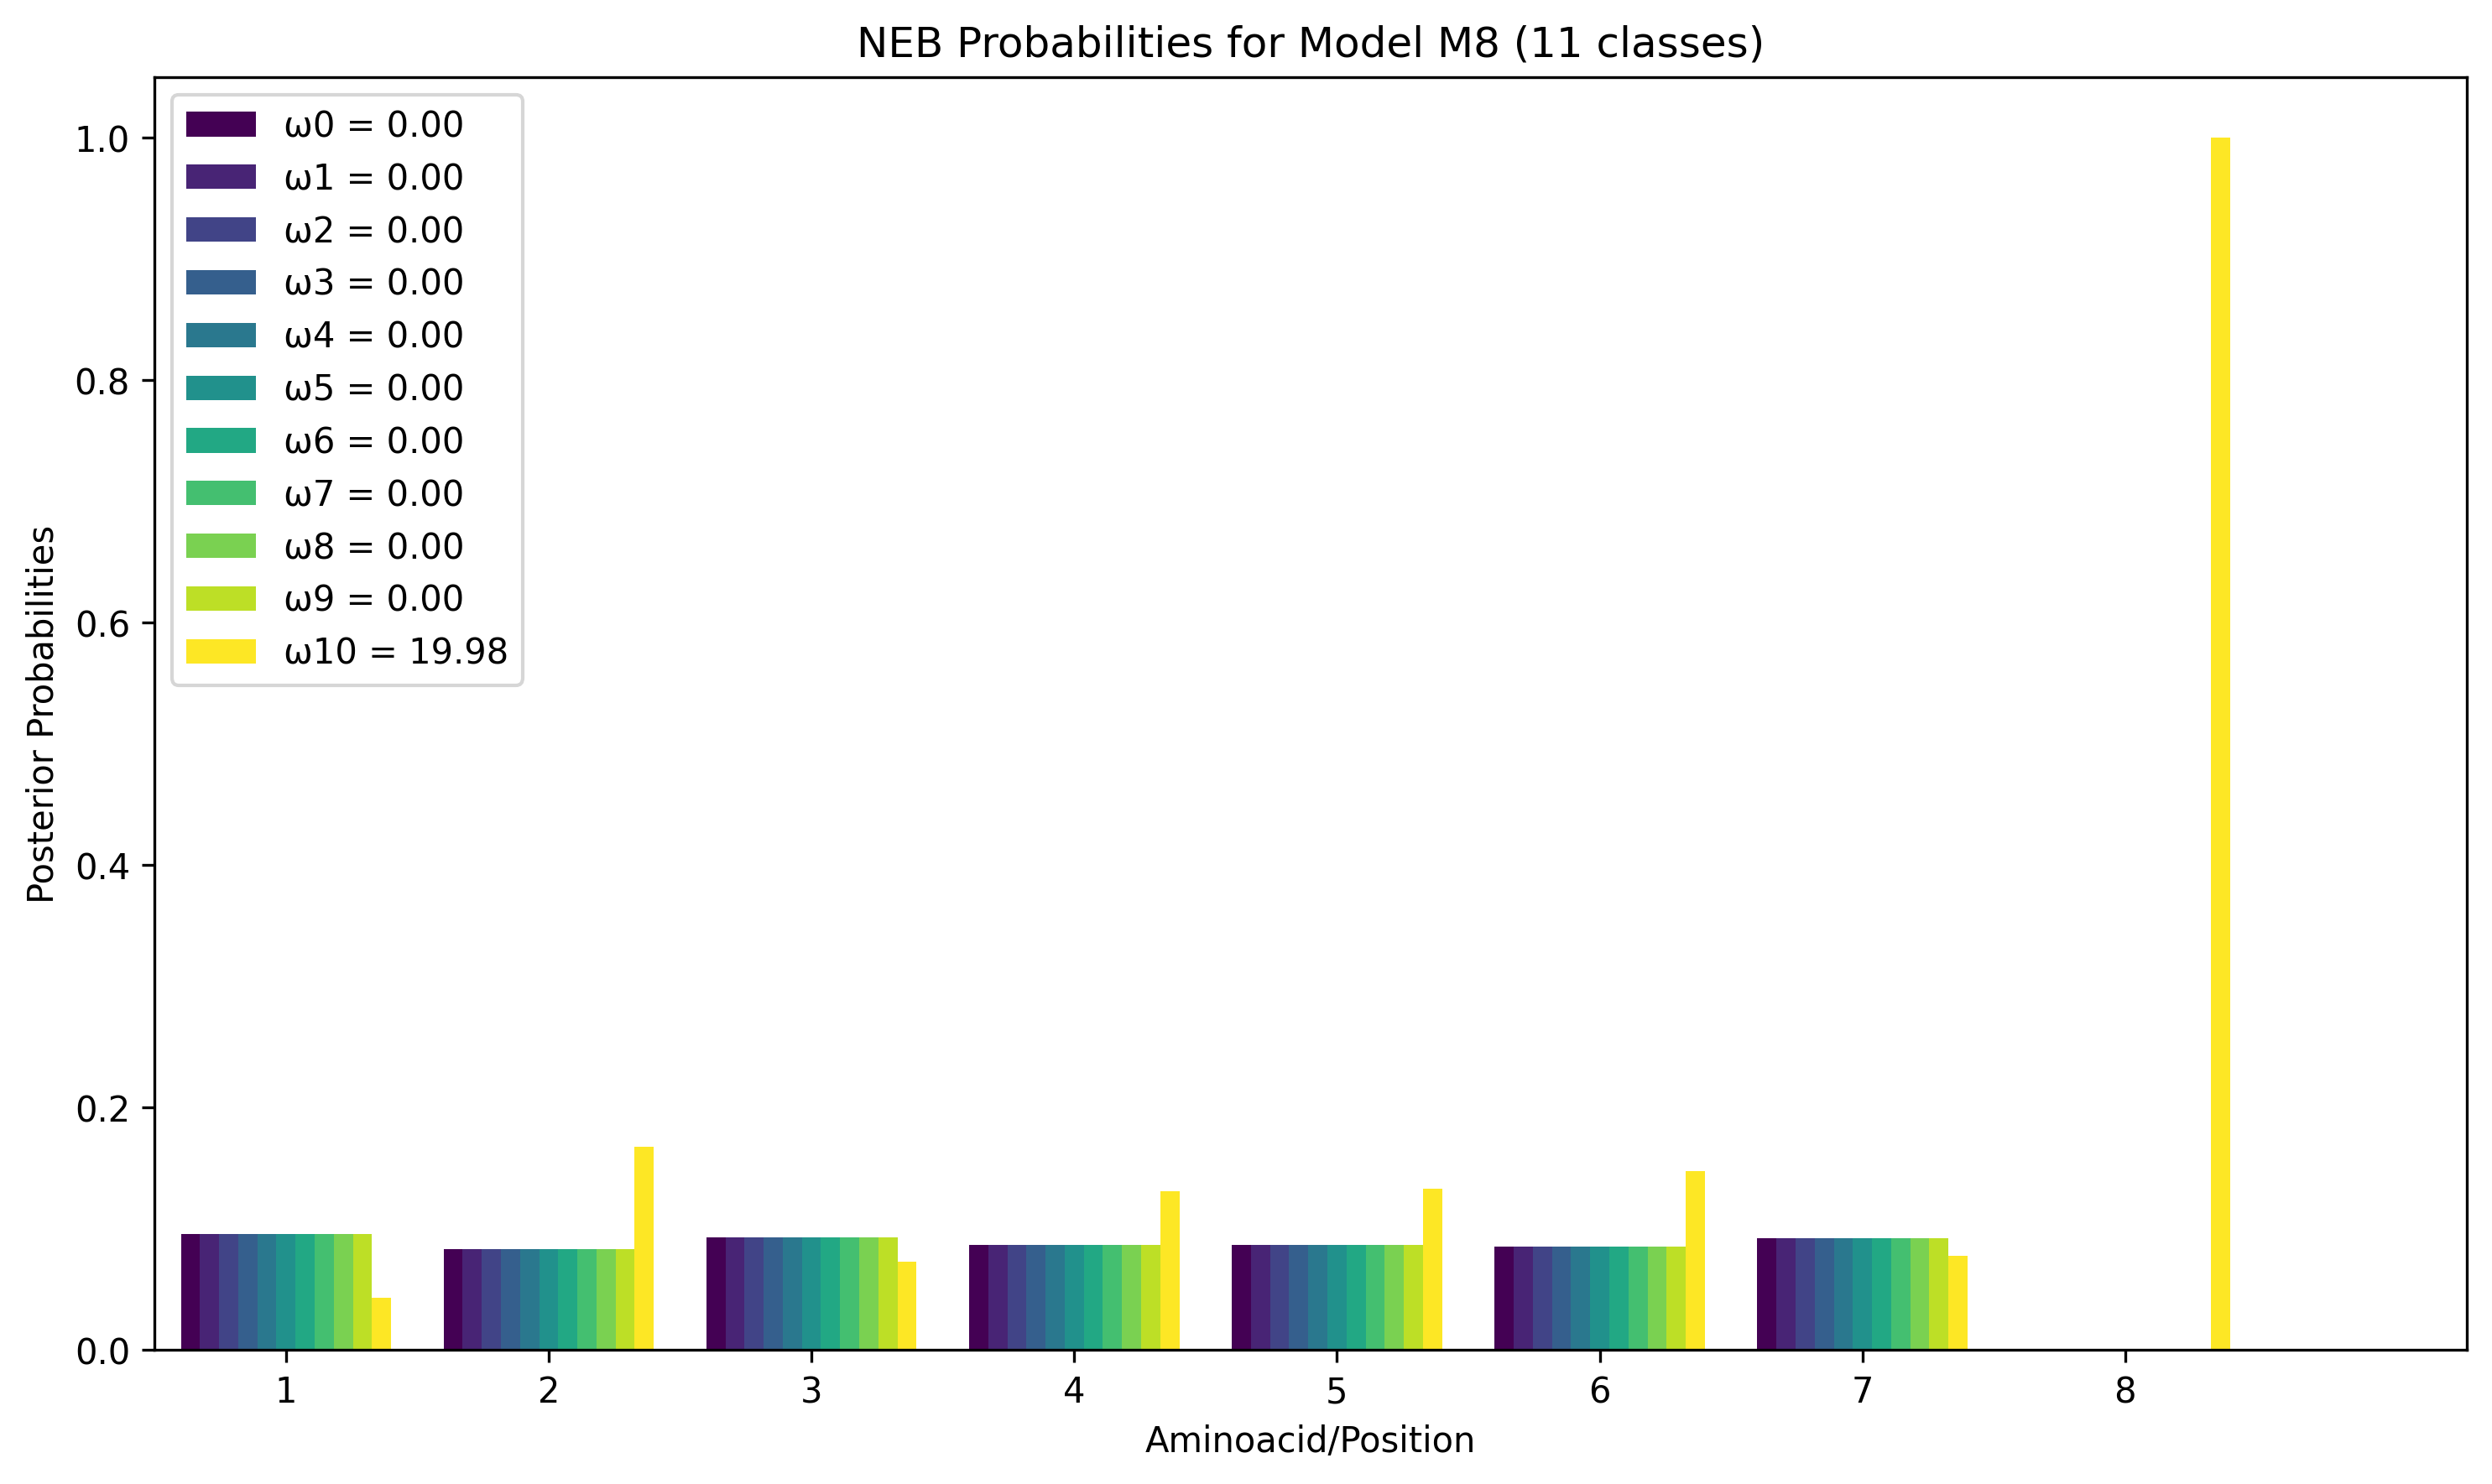

<ipython-input-4-51b136b43988>:488: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']
<ipython-input-4-51b136b43988>:504: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


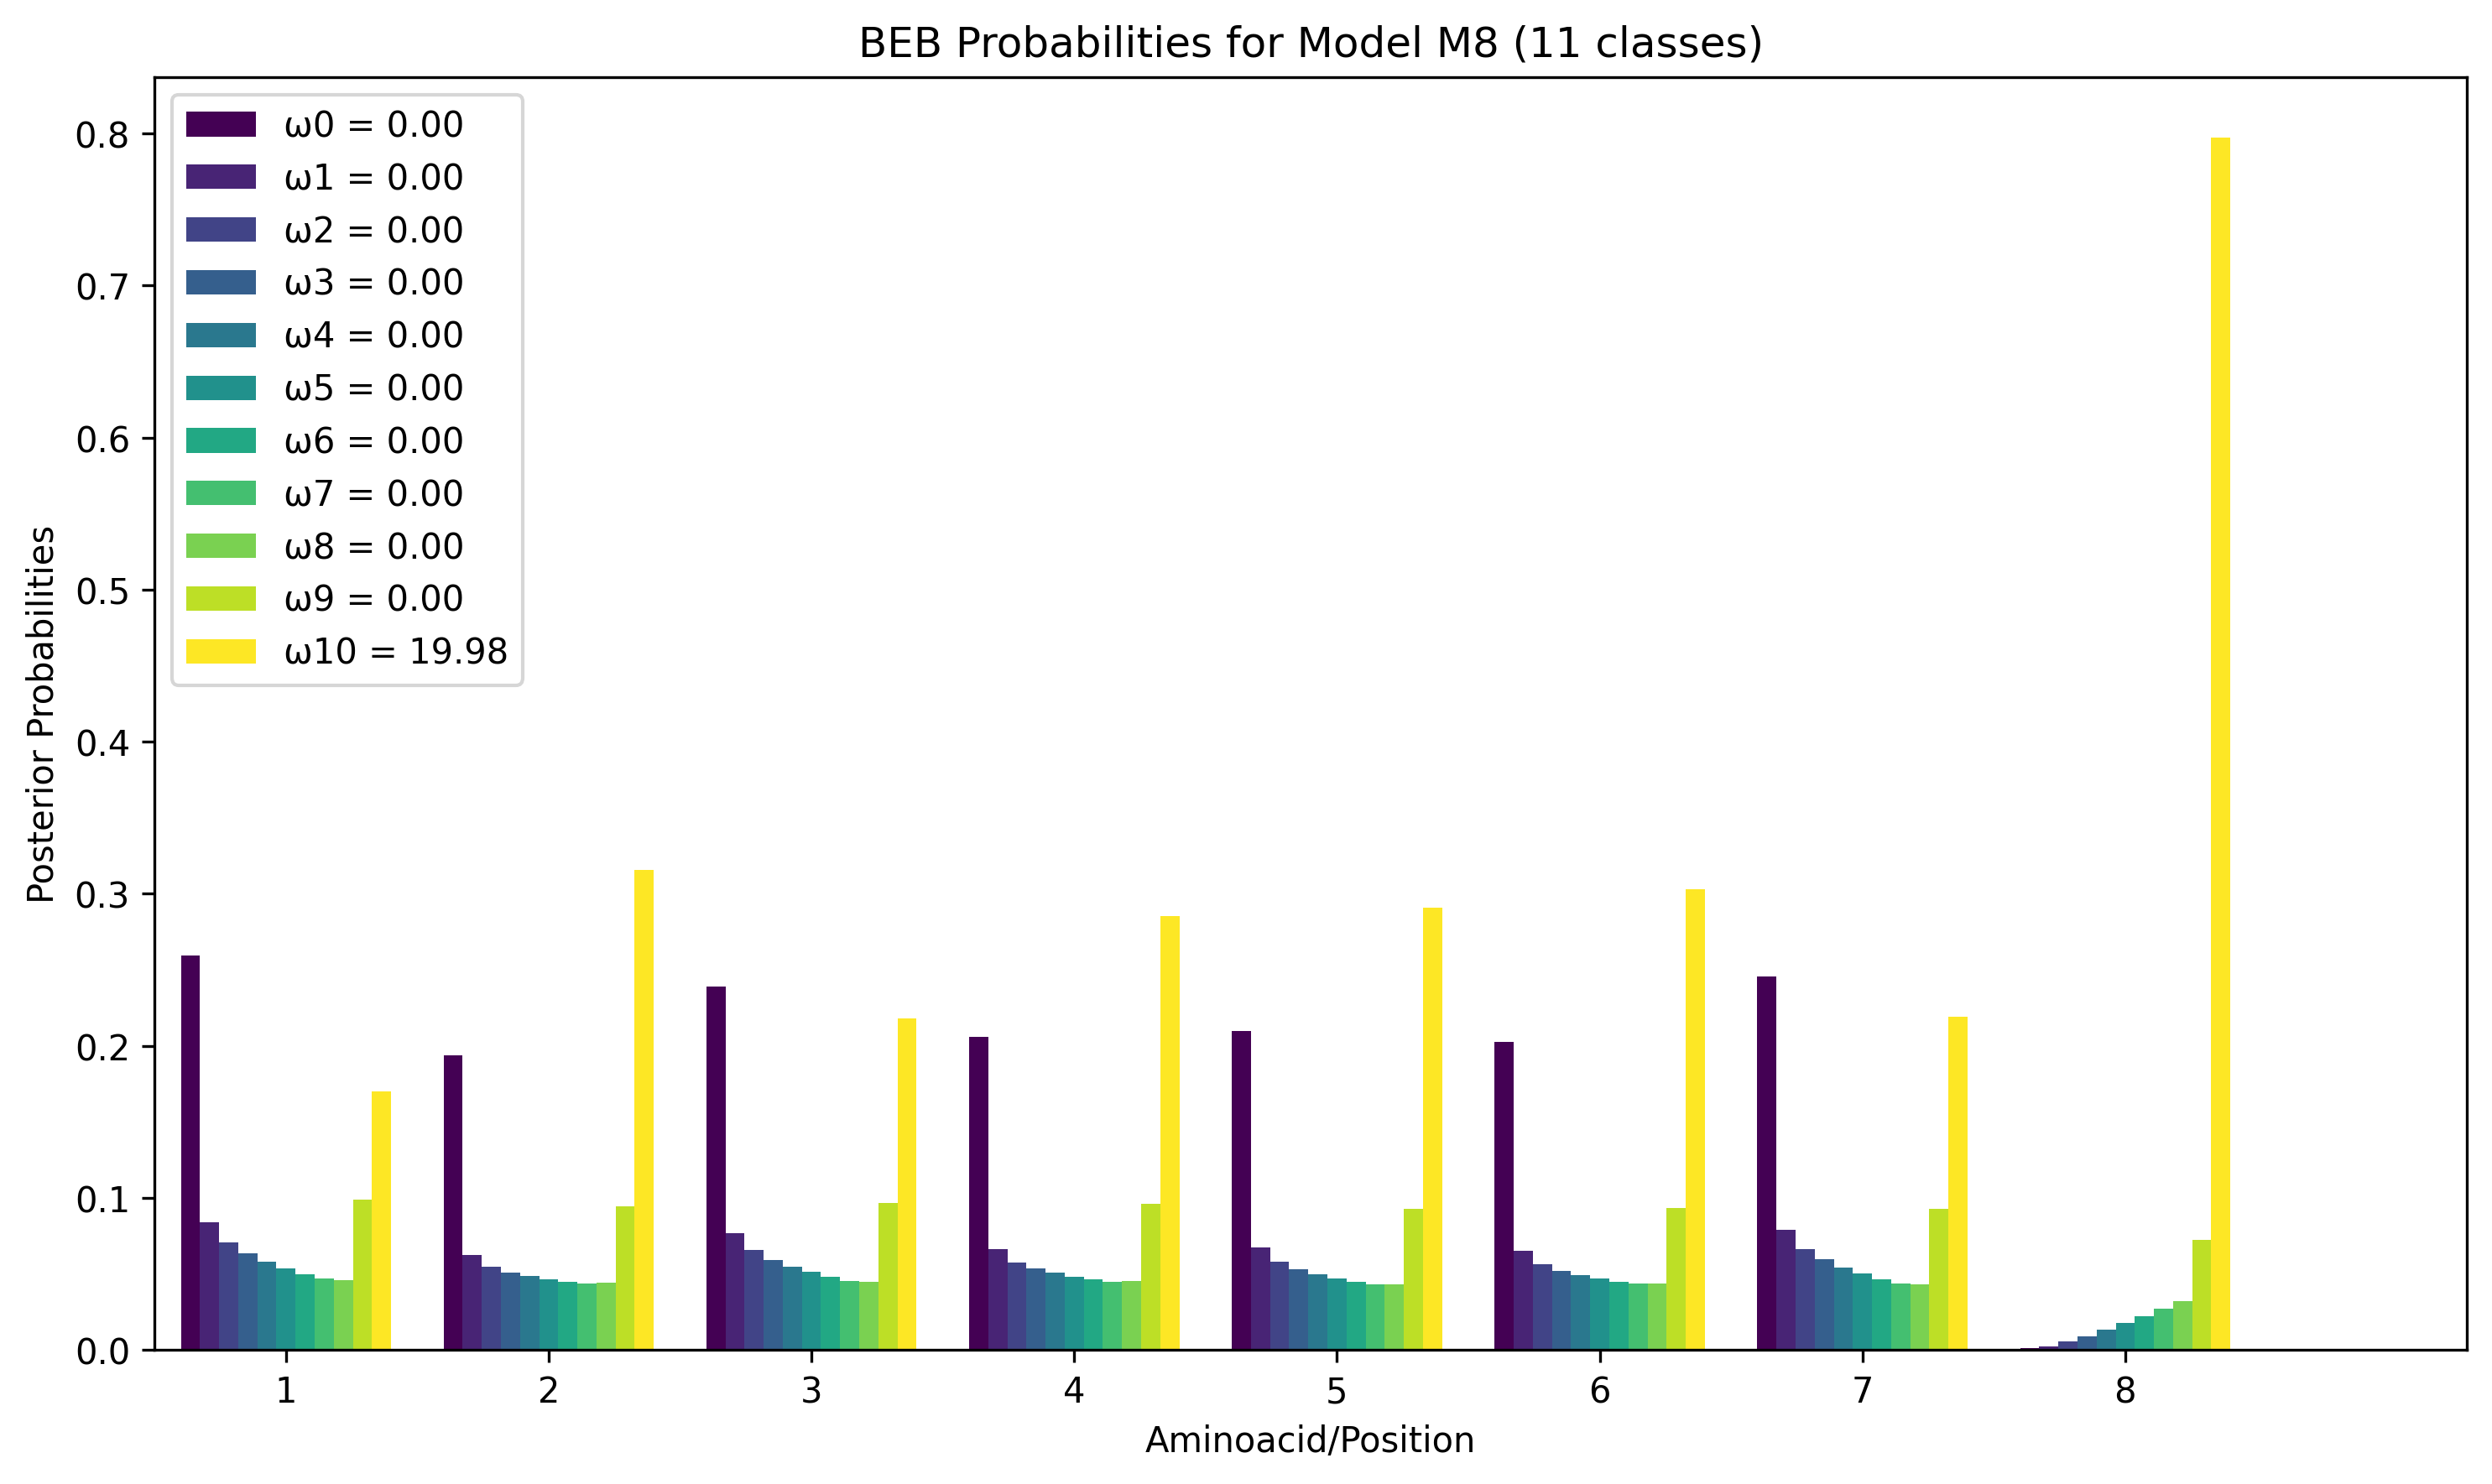

Nested models,dN/dS,Parameter estimates,np,ℓ,Model compare,2Δℓ,2Δℓ p-value,χ²,PSS (BEB)
M0: one-ratio (1),0.5843,ω = 0.58425,11,-40.37,M0 vs. M3 (df = 4),3.34,0.503061,"χ² (0.05): 9.487729, χ² (0.01): 13.276704",Not allowed
M3: discrete (5),4.4292,"p0 = 0.00000, p1 = 0.77827, p2 = 0.22173 ω0 = 0.00000, ω1 = 0.00000, ω2 = 19.97626",15,-38.70,,,,,None
M1a: nearly neutral (2),0.2642,"p0 = 0.00000, p1 = 0.77827, p2 = 0.22173",12,-39.37,M1 vs. M2 (df = 2),3.34,0.514061,"χ² (0.05): 5.991465, χ² (0.01): 9.210340",Not allowed
M2a: positive selection (4),4.4292,"p0 = 0.00000, p1 = 0.77827, p2 = 0.22173 ω0 = 0.00000, ω1 = 1.00000, ω2 = 19.97626",14,-38.70,,,,"χ² (0.05): 5.991465, χ² (0.01): 9.210340",Not allowed
M7: beta (2),0.5808,p = 99.00000 q = 71.45650,12,-40.37,M7 vs. M8 (df = 2),3.34,0.189049,"χ² (0.05): 5.991465, χ² (0.01): 9.210340",Not allowed
M8: beta&ω (4),4.4292,"p0 = 0.00000, p1 = 0.77827, p2 = 0.22173 ω0 = 0.00000, ω1 = 0.00000, ω2 = 0.00000, ω3 = 0.00000, ω4 = 0.00000, ω5 = 0.00000, ω6 = 0.00000, ω7 = 0.00000, ω8 = 0.00000, ω9 = 0.00000, ω10 = 19.97621",14,-38.70,,,,,Not allowed


Table exported to /content/drive/MyDrive/hugo2024codeml/teste/outputs/test_formatted_phylip_codeml_table.docx


In [4]:
#TESTANDO AQUI
import os
import re
import glob
import logging
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2

import docx
from fpdf import FPDF
from docx import Document
from docx.shared import Pt
from docx.shared import RGBColor
#from docx.enum.table import WD_TABLE_ALIGNMENT, WD_CELL_VERTICAL_ALIGNMENT, WD_BORDER # Importing from docx.enum.table
from docx.enum.style import WD_STYLE_TYPE # Importing from docx.enum.style
from docx.oxml import OxmlElement
from docx.oxml.ns import qn

#from docx.enum.table import WD_TABLE_ALIGN
#from docx.enum.table import WD_CELL_VERTICAL_ALIGNMENT
#from docx.oxml import OxmlElement
#from docx.oxml.ns import qn

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
from bokeh.palettes import viridis
from bokeh.transform import stack




# Define global variable

codeml_list = ['M0', 'M1', 'M2', 'M3', 'M7', 'M8']  # Subdirectory names


# Function to extract a floating-point number after a pattern

def find_float_after(outfile_path, pattern, regex):
    #Finds a floating-point number after a specific pattern in a file.
    #print(f"Debugging: outfile_path={outfile_path}, pattern={pattern}, regex={regex}")

    try:
        with open(outfile_path, 'r') as f:
            for line in f:
               ### print(f"Debugging: Processing line: {line.strip()}")
                if pattern in line:
                    match = re.search(regex, line)
                    if match:
              ###          print(f"Debugging: Found match: {match.group(1)}")
                        return float(match.group(1))
    except FileNotFoundError:
        print(f"File not found: {outfile_path}")
    except AttributeError:
        print(f"Pattern '{pattern}' not found or regex '{regex}' didn't match in {outfile_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None  # Return None if no match is found or an error occurs


def find_collection_float_array_after(path_in, match, regex, section='all'):
    """Finds and extracts data from the rst file based on the specified section, including w: and p:."""

    neb_data = []
    beb_data = []
    neb_positive_selection_data = []
    beb_positive_selection_data = []
    current_section = None
    positive_selection_started = False
    w_values = []  # List to store w values
    p_values = []  # List to store p values

    try:
        with open(path_in, 'r') as f:
            for line in f:
                # Check for section headers and update current_section
                if "Naive Empirical Bayes (NEB) probabilities" in line:
                    current_section = 'NEB'
                    positive_selection_started = False
                elif "Bayes Empirical Bayes (BEB) probabilities" in line:
                    current_section = 'BEB'
                    positive_selection_started = False
                elif "Positively selected sites" in line:
                    positive_selection_started = True

                # Extract w: and p: values
                if line.startswith("w:"):
                    w_values.extend([float(x) for x in line.split()[1:] if x.replace('.', '', 1).isdigit()])
                elif line.startswith("p:"):
                    p_values.extend([float(x) for x in line.split()[1:] if x.replace('.', '', 1).isdigit()])


                # Extract NEB/BEB data if line matches the pattern and within the correct section
                if re.match(match, line) and current_section and (section == 'all' or section == current_section):
                    try:
                        #line = line.replace(' (', '(').replace(') ', ')')
                        elements = line.split()
                        site_number = int(elements[0])
                        amino_acid = elements[1]
                        data_elements = []


                        for element in elements[2:]:
                            if element.replace('.', '', 1).isdigit():
                                data_elements.append(float(element))
                            # Updated condition to capture all parenthesized elements
                            elif re.match(r'\(\d+\)', element) or re.match(r'\(\s*\d+\s*\)', element):
                                data_elements.append(element)
                            elif re.search(r'\d+\.\d+\*{1,2}', element):
                                data_elements.append(element)
                            else:
                                data_elements.append(element)

                        # Always include site_number and amino_acid in row_data
                        row_data = [site_number, amino_acid] + data_elements

                        if row_data:
                            if current_section == 'NEB':
                                if positive_selection_started:
                                    neb_positive_selection_data.append(row_data)
                                else:
                                    neb_data.append(row_data)
                            elif current_section == 'BEB':
                                if positive_selection_started:
                                    beb_positive_selection_data.append(row_data)
                                else:
                                    beb_data.append(row_data)

                    except (ValueError, IndexError) as e:
                        print(f"Warning: Error processing line: {line.strip()}")
                        print(f"Error: {e}")

    except FileNotFoundError:
        print(f"Error: File not found - {path_in}")
    except Exception as e:
        print(f"Error processing file {path_in}: {e}")

    # Return all extracted data
    return neb_data, beb_data, neb_positive_selection_data, beb_positive_selection_data, w_values, p_values


# Function to process codeml.ctl files
def process_codeml(file_path):
    """Extracts variables from codeml.ctl files."""

    # Define patterns for extracting values from the codeml.ctl file
    patterns = {
        "seqfile": r'seqfile\s*=\s*(\S+)',  # Updated regex for seqfile
        "treefile": r'treefile\s*=\s*(\S+)',
        "outfile": r'outfile\s*=\s*(\S+)'  # Extract outfile without extra spaces
    }
    extracted = {}

    # Open the codeml.ctl file and read its content
    try:
        with open(file_path, 'r') as f:
            content = f.read()
            #print(f"a.- Processing file: {file_path}")  # Debugging print

        for key, pattern in patterns.items():
            match = re.search(pattern, content)
            if match:
                # Extract the filename and store it in the extracted dictionary
                extracted[key] = os.path.basename(match.group(1).strip())  # Extract the matched group and strip whitespace
                #print(f"extracted[{key}]: {extracted[key]}")  # Print extracted[key]

        # Get the outfile name from the extracted dictionary
        outfile_name = extracted.get("outfile")
        seqfile_name = extracted.get("seqfile")  # Get seqfile name
       # treefile_name = extracted.get("treefile")

        # If outfile_name is found
        if outfile_name:

            # Construct the full path to the outfile
            full_outfile_path = os.path.join(os.path.dirname(file_path), outfile_name)
            full_seqfile_path = os.path.join(os.path.dirname(file_path), seqfile_name)
            #print(f"c.- Full outfile path: {full_outfile_path}")  # Debugging print: Shows the full path to the outfile

            # Return both the result path and extracted data
            return full_outfile_path, full_seqfile_path

    except Exception as e:
        # Print an error message if something goes wrong
        print(f"Error processing {file_path}: {e}")
        return None

# Function to scan directories and find codeml.ctl and rst files
def scan_dir(scan_path):
    """Scans directories recursively to find codeml.ctl and rst files."""
    results = [] # List to store Result objects

    #print(f"2.- Inside SCAN_DIR {scan_path}")

    for sub_dir in os.listdir(scan_path):  # Interact for subdirectories in scan_path
        if sub_dir in codeml_list:  # Verify if the subdirectories is in the list codeml_list
            specific_path = os.path.join(scan_path, sub_dir)

            if os.path.exists(specific_path) and os.path.isdir(specific_path):
                #print(f"3.- Subdirectory: {specific_path} exists and is a directory.")  # Debug: Confirm existence

                # Find and process the ctl file
                ctl_file_path = os.path.join(specific_path, 'codeml.ctl')  # Direct file path
               # print(f"ctl_file_path: {ctl_file_path}")  # Debug: Print the path

                # If ctl file exists, process it
                if os.path.exists(ctl_file_path):
                    # Get the result path and extracted dictionary from process_codeml
                    outfile_path, seqfile_path = process_codeml(ctl_file_path)  # Using outfile_path here

                    if outfile_path and seqfile_path:  # Check if both paths are valid
                        result = Result(specific_path, ctl_file_path, seqfile_path)  # Pass seqfile_path to Result
                        results.append(result)
                    else:
                        print(f"WARNING: Could not process {ctl_file_path} due to missing outfile or seqfile.")


                    # Find and set the rst_path in the Result object (if rst file exists)
                    rst_file_path = os.path.join(specific_path, 'rst')
                    #print(f"rst_file_path: {rst_file_path}")
                    if os.path.exists(rst_file_path):
                        #print(f"Found rst file: {rst_file_path}")
                        result.rst_path = rst_file_path
                        result.process_rst_file() # Process rst file data
                    else:
                        print(f"WARNING: No rst file found in {specific_path}")

                else:
                    print(f"WARNING: ctl file not found in {specific_path}")

    return results


# Class to handle results
class Result:
    def __init__(self, _path, ctl_file_path, seqfile_name):
        #print("Inside Result constructor")
        self.path = _path
        self.ctl_file_path = ctl_file_path
        self.seqfile_name = seqfile_name  # Store seqfile_name

        # Initialize n_beb and n_neb to empty lists in the constructor
        self.n_beb = []
        self.n_neb = []

        # Extract lnl, kappa, and omega from the outfile indicated in ctl_file_path
        outfile_path, _ = process_codeml(self.ctl_file_path)  # Unpack, but ignore seqfile_path
        if outfile_path: # Check if outfile_path is valid before proceeding.
            self.result_path = outfile_path
            self.lnl = find_float_after(outfile_path, 'lnL', r'lnL\(ntime:\s*\d+\s+np:\s*\d+\):\s*(-?\d+\.\d+)')
            self.kappa = find_float_after(outfile_path, 'kappa', r'kappa \(ts/tv\)\s*=\s*(\d+\.\d+|\d+)')
            self.omega = find_float_after(outfile_path, 'omega', r'omega \(dN/dS\)\s*=\s*(\d+\.\d+|\d+)')
            self.np = find_float_after(outfile_path, 'np', r'lnL\(ntime:\s*\d+\s+np:\s*(\d+)\):') # Extract np


            # Extract the entire line containing p and q for M7
            with open(outfile_path, 'r') as f:
                for line in f:
                    if "Parameters in M7 (beta):" in line:
                        self.pq_line_m7 = next(f).strip()  # Store the next line directly
                        break  # Stop searching after finding the line
                else:  # If the loop completes without finding "Parameters in M7 (beta):"
                    self.pq_line_m7 = None  # Set to None if not found

            print(f"pq_line_m7: {self.pq_line_m7}")  # Print extracted line for debugging



            # Extract the entire line containing p0, p, q, p1, w for M8
            with open(outfile_path, 'r') as f:
                for line in f:
                    if "Parameters in M8 (beta&w>1):" in line:
                        self.pq_line_m8 = next(f).strip()  # Store the next line directly
                        self.pq_line_m8 += " " + next(f).strip() # Append the second line with a space
                        break  # Stop searching after finding the line
                else:  # If the loop completes without finding "Parameters in M7 (beta):"
                    self.pq_line_m8 = None  # Set to None if not found

            print(f"pq_line_m8: {self.pq_line_m8}")  # Print extracted line for debugging


            # Extract dN/dS for branch
            with open(outfile_path, 'r') as f:
                outfile_content = f.read()

                # Find the header line using a more flexible regex
                header_match = re.search(r'dN\s&\sdS\sfor\seach\sbranch\n\s*branch\s+t\s+N\s+S\s+dN/dS', outfile_content, re.IGNORECASE)

                if header_match:
                    # Extract data from the lines following the header
                    data_lines = outfile_content[header_match.end():].strip().split('\n')
                    for line in data_lines:
                        if line.strip() and not line.strip().startswith('('):  # Skip empty and comment lines
                            try:
                                values = line.split()
                                self.dnds_branch = float(values[4])  # Extract the 5th element (dN/dS)
                                print(f"dnds_branch extracted: {self.dnds_branch}")
                                break  # Stop searching after finding the value
                            except (IndexError, ValueError):
                                print(f"Error extracting dN/dS from line: {line}")
                                pass  # Ignore lines that don't have the expected format
                    else:  # If the loop completes without finding a valid dN/dS value
                        print("Could not find a valid dN/dS value after the header.")
                        self.dnds_branch = None

                else:  # If the header line is not found
                    print("Header line for dN/dS not found in the file.")
                    self.dnds_branch = None

            print(f"dnds_branch: {self.dnds_branch}")  # Print the extracted value

        else:
            # Handle case where outfile_path is invalid (None)
            #print(f"Error: Invalid outfile_path for {ctl_file_path}")
            self.result_path = None
            self.lnl = None
            self.kappa = None
            self.omega = None
            self.np = None  # Set np to None if outfile_path is invalid
            self.dnds_branch = None
            self.pq_line_m7 = None
            self.pq_line_m8 = None


        # Path to 'rst' directory (assuming it's in the same directory as ctl)
        self.rst_path = os.path.join(self.path, "rst")
        self.n = []  # Initialize n as an empty list


    def process_rst_file(self):
        """Processes the rst file and extracts relevant data."""
#        print(f"Debugging: Entering process_rst_file for {self.path}")  # Print when entering the method
        if self.rst_path and os.path.exists(self.rst_path):
#            print(f"Debugging: rst file found at {self.rst_path}")  # Print if rst file exists
            with open(self.rst_path, 'r') as f:
                lines = f.readlines()


            # Add these lines to process_rst_file:
            self.n_neb, _, _, _, self.w, self.p = find_collection_float_array_after(
                self.rst_path, '[ ]+\d+ ', r'(\d+[ ]+)|(-)|([a-zA-Z])|(\d+[.]\d+)|(\*)')

            # Model-specific logic for M3, M2, and M8
            if any(model in self.path for model in ["M3", "M2", "M8"]):  # Check if it's one of the specific models
#                print(f"Processing rst file for model {os.path.basename(self.path)} using model-specific logic")  # Print statement added
#                print(lines)  # Print lines here, only for M3, M2, M8

                # Extract self.n for these models using your previous method:
                # Extract data using find_collection_float_array_after for NEB and BEB
                self.n_neb = find_collection_float_array_after(self.rst_path, '[ ]+\d+ ', '(\d+[ ]+)|(-)|([a-zA-Z])|(\d+[.]\d+)|(\*)', section='NEB')
                self.n_beb = find_collection_float_array_after(self.rst_path, '[ ]+\d+ ', '(\d+[ ]+)|(-)|([a-zA-Z])|(\d+[.]\d+)|(\*)', section='BEB')

        else:
            print(f"WARNING: No rst file found in {self.path}")


    def log(self):
        # Using the logging library to print logs
        print("Inside log() method")
        log.info(f'result_path: {self.result_path}')
        log.info(f'lnl: {self.lnl}')
        log.info(f'rst_path: {self.rst_path}')
        log.info(f'w: {self.w}')
        log.info(f'p: {self.p}')
        log.info(f'kappa: {self.kappa}')
        log.info(f'omega: {self.omega}')
        log.info(f'np: {self.np}')
        log.info(f'dnds_branch: {self.dnds_branch}')

    def get_chart_data(self):
        # ... (logic to generate chart data) ...
        #return chart_data
        pass  # This function is not used

def lrt(r0, r1):
    # Access lnl directly from Result objects
    lrt_value = 2 * (r1.lnl - r0.lnl)
    return lrt_value


fasta_lrt = {}
def calc_fasta_lrt():
    try:
        # Create a dictionary to store results by model name
        results_by_model = {}
        for result in result_list:
            model_name = next((model for model in ["M0", "M1", "M2", "M3", "M7", "M8"] if model in result.path), None)
            if model_name:
                results_by_model[model_name] = result

        # Perform LRT calculations and print results, using os.path.basename() to get only the filename
        if 'M0' in results_by_model and 'M3' in results_by_model:
            fasta_lrt['M0-M3'] = {
               'lrt': lrt(results_by_model['M0'], results_by_model['M3']),
               'p-value': 1 - chi2.cdf(lrt(results_by_model['M0'], results_by_model['M3']), 4)  # df = 4 for M0 vs. M3
            }

            # Calculate and store critical values for M0-M3 within fasta_lrt
            fasta_lrt['M0-M3']['critical_value_5percent'] = chi2.ppf(1 - 0.05, 4)
            fasta_lrt['M0-M3']['critical_value_1percent'] = chi2.ppf(1 - 0.01, 4)

          #  print(f'{os.path.basename(results_by_model["M0"].seqfile_name)}, lrt M0-M3 = 2 * ({results_by_model["M3"].lnl:.10f}- {results_by_model["M0"].lnl:.10f})= {fasta_lrt["M0-M3"]["lrt"]:.10f}, p-value = {fasta_lrt["M0-M3"]["p-value"]:.6f}')

            print(f'{os.path.basename(results_by_model["M0"].seqfile_name)}, lrt M0-M3 = 2 * ({results_by_model["M3"].lnl:.10f}- {results_by_model["M0"].lnl:.10f})= {fasta_lrt["M0-M3"]["lrt"]:.10f}, p-value = {fasta_lrt["M0-M3"]["p-value"]:.6f}, '
                  f'χ² (0.05) = {fasta_lrt["M0-M3"]["critical_value_5percent"]:.6f}, χ² (0.01) = {fasta_lrt["M0-M3"]["critical_value_1percent"]:.6f}')

        if 'M1' in results_by_model and 'M2' in results_by_model:
            fasta_lrt['M1-M2'] = {
               'lrt': lrt(results_by_model['M1'], results_by_model['M2']),
               'p-value': 1 - chi2.cdf(lrt(results_by_model['M1'], results_by_model['M2']), 2)  # df = 2 for M1 vs. M2
            }

            # Calculate and store critical values for M1-M2 within fasta_lrt
            fasta_lrt['M1-M2']['critical_value_5percent'] = chi2.ppf(1 - 0.05, 2)
            fasta_lrt['M1-M2']['critical_value_1percent'] = chi2.ppf(1 - 0.01, 2)
#            print(f'{os.path.basename(results_by_model["M1"].seqfile_name)}, lrt M1-M2 = 2 * ({results_by_model["M2"].lnl:.10f}- {results_by_model["M1"].lnl:.10f})= {fasta_lrt["M1-M2"]["lrt"]:.10f}, p-value = {fasta_lrt["M1-M2"]["p-value"]:.6f}, ')
            print(f'{os.path.basename(results_by_model["M1"].seqfile_name)}, lrt M1-M2 = 2 * ({results_by_model["M2"].lnl:.10f}- {results_by_model["M1"].lnl:.10f})= {fasta_lrt["M1-M2"]["lrt"]:.10f}, p-value = {fasta_lrt["M1-M2"]["p-value"]:.6f}, '
                  f'χ² (0.05) = {fasta_lrt["M1-M2"]["critical_value_5percent"]:.6f}, χ² (0.01) = {fasta_lrt["M1-M2"]["critical_value_1percent"]:.6f}')

        if 'M7' in results_by_model and 'M8' in results_by_model:
            fasta_lrt['M7-M8'] = {
               'lrt': lrt(results_by_model['M7'], results_by_model['M8']),
               'p-value': 1 - chi2.cdf(lrt(results_by_model['M7'], results_by_model['M8']), 2)  # df = 2 for M1 vs. M2
            }

            # Calculate and store critical values for M7-M8 within fasta_lrt
            fasta_lrt['M7-M8']['critical_value_5percent'] = chi2.ppf(1 - 0.05, 2)
            fasta_lrt['M7-M8']['critical_value_1percent'] = chi2.ppf(1 - 0.01, 2)
#            print(f'{os.path.basename(results_by_model["M7"].seqfile_name)}, lrt M7-M8 = 2 * ({results_by_model["M8"].lnl:.10f}- {results_by_model["M7"].lnl:.10f})= {fasta_lrt["M7-M8"]["lrt"]:.10f}, p-value = {fasta_lrt["M7-M8"]["p-value"]:.6f}')
            print(f'{os.path.basename(results_by_model["M7"].seqfile_name)}, lrt M7-M8 = 2 * ({results_by_model["M8"].lnl:.10f}- {results_by_model["M7"].lnl:.10f})= {fasta_lrt["M7-M8"]["lrt"]:.10f}, p-value = {fasta_lrt["M7-M8"]["p-value"]:.6f}, '
                  f'χ² (0.05) = {fasta_lrt["M7-M8"]["critical_value_5percent"]:.6f}, χ² (0.01) = {fasta_lrt["M7-M8"]["critical_value_1percent"]:.6f}')

    except Exception as e:
        log.warning('Error in LRT process: %s' % e)


def make_chart(data, section_name, model_name, result, output_path):  # Add model_name as argument
    logging.debug(f"Entering make_chart with {section_name} data: {data}")
    #print(f"Debugging make_chart: section_name = {section_name}, model_name = {model_name}, data type = {type(data)}, data = {data}")  # Debug print

    if isinstance(data, list) and data and isinstance(data[0], list):
        # Create a figure and axes for the plot
        fig, ax = plt.subplots(dpi=300, figsize=(10, 6))  # Adjust width and height as needed

        # Extract x and y data for the bar chart
        x_data = [f"{i[0]} {i[1]}" for i in data]  # Position and Aminoacid

        # Determine number of probability columns based on model
        if model_name == "M1":
            num_prob_cols = 2
        elif model_name == "M2":
            num_prob_cols = 3
        elif model_name == "M3":
            num_prob_cols = 3
        elif model_name == "M7":
            num_prob_cols = 10
        elif model_name == "M8":
            num_prob_cols = 11
        else:
            num_prob_cols = 3  # Default to 3 if model not recognized

        # Extract y_data (no normalization)
        y_data = [i[2:2 + num_prob_cols] for i in data]

        # Get w_values from the result object
        w_values = result.w  # Assuming result.w contains the omega values


        # Create bar chart (adjust width and positions as needed)
        width = 0.8 / num_prob_cols  # Adjust width based on number of columns
        x_pos = np.arange(len(x_data))  # Positions for the bars


        # Create a list of legend handles and labels (with colors)
        legend_handles = []
        legend_labels = []

        # Generate distinct colors using a colormap
        colors = cm.get_cmap('viridis', num_prob_cols) # Or use matplotlib.colormaps['viridis']

        # Plot bars for each probability column
        for i in range(num_prob_cols):
            color = colors(i)
            label = f'ω{i} = {w_values[i]:.2f}'
            if label not in legend_labels:
                # Add label only once per omega value
                legend_labels.append(label)
                legend_handles.append(ax.bar(0, 0, color=color)[0])  # Create dummy bar for legend

            # Plot the actual bar chart without label
            ax.bar(x_pos + i * width - width * num_prob_cols / 2 + width / 2,
                  [row[i] for row in y_data], width, color=color)  # No label here

        # Place legend below the main plot with horizontal arrangement
        ax.legend(handles=legend_handles, ncol=num_prob_cols, loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)

        # Customize the plot
        ax.set_xlabel("Aminoacid/Position")
        ax.set_ylabel("Posterior Probabilities")
        ax.set_title(f"{section_name} Probabilities for Model {model_name} ({num_prob_cols} classes)")

        # Dynamically determine tick_interval
        alignment_length = len(x_data)
        tick_interval = 1 if alignment_length <= 100 else (100 if alignment_length <= 1000 else (1000 if alignment_length <= 10000 else 100))

        # Calculate tick positions
        tick_positions = np.arange(0, alignment_length, tick_interval)

        # Generate desired tick labels (1, 100, 200, 300, ...)
        xticklabels = [str(p + 1) for p in tick_positions]  # Modified label generation using tick_positions directly

        # Apply tick positions and labels
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(xticklabels, rotation=0, ha='center')

        # --- Adjust bar widths and positions to prevent cutting ---
        bar_width = 0.8 / num_prob_cols  # Adjust width based on number of columns

        # Calculate bar positions to align with tick positions
        bar_positions = np.arange(len(x_data))

        # Create bar chart with adjusted positions and widths
        for i in range(num_prob_cols):
            ax.bar(bar_positions + i * bar_width - bar_width * num_prob_cols / 2 + bar_width / 2,
                  [row[i] for row in y_data], bar_width, label=f'ω{i} = {w_values[i]:.2f}', color=colors(i))

        # --- Adjust x-axis limits precisely ---
        ax.set_xlim(left=bar_positions[0] - bar_width / 2, right=bar_positions[-1] + bar_width * (num_prob_cols - 0.5) ) # Adjust as needed

        ax.legend()

        # Set y-axis limits to 0.0 and 1.0
        ax.set_xlim(left=-0.5, right=len(x_data) - 0.5 + bar_width * num_prob_cols)

        # Show the plot
        plt.tight_layout()  # To avoid labels overlapping


        # Place the chart saving code here:
        chart_filename = f"{section_name}_{model_name}_chart.png"  # Create filename
        chart_filepath = os.path.join(output_path, chart_filename)  # Construct filepath
        plt.savefig(chart_filepath, dpi=300)  # Save the chart with higher resolution

        plt.show()

        plt.close()  # Close the plot to release resources


    else:
        print(f"Error: Invalid input for make_chart ({section_name}, {model_name})")


def create_model_table(result_list):
    """Creates a table summarizing the results of different CodeML models."""

    # Define the desired order of models (using M1a and M2a for display)
    model_order = ["M0", "M3", "M1", "M2", "M7", "M8"]
    model_mapping = {"M1": "M1a", "M2": "M2a"}  # Mapping for display names

    data = []
    for model_name in model_order:  # Iterate through models in desired order
        # Find the result for the current model
        result = next((r for r in result_list if model_name in r.path), None)
        if result is None:
            print(f"WARNING: Model {model_name} not found in results.")
            continue

        # Extract data from result object based on model
        # Use display name if available, otherwise use original model name
        display_name = model_mapping.get(model_name, model_name)

       # Get lrt_value from fasta_lrt dictionary
        if model_name == "M0":
#            lrt_value = fasta_lrt.get("M0-M3")  # Get from dictionary, defaults to None if not found
            # Get lrt_value and p-value from fasta_lrt dictionary
            lrt_data = fasta_lrt.get("M0-M3", {})  # Get dictionary for "M0-M3", default to empty dict if not found
            lrt_value = lrt_data.get('lrt')  # Get lrt value, default to None if not found
            p_value = lrt_data.get('p-value')  # Get p-value, default to None if not found
            # Access critical values (using .get with default values)
            critical_value_5percent = fasta_lrt.get("M0-M3", {}).get("critical_value_5percent", "")
            critical_value_1percent = fasta_lrt.get("M0-M3", {}).get("critical_value_1percent", "")

#            row = [f"{display_name}: one-ratio (1)", f"{result.omega:.4f}", f"ω = {result.omega:.5f}", int(result.np), f"{result.lnl:.2f}", f"M0 vs. M3 (df = 4)", f"{lrt_value:.2f}", f"{p_value:.6f}", "Not allowed"] # Use result.np here
            row = [f"{display_name}: one-ratio (1)", f"{result.omega:.4f}", f"ω = {result.omega:.5f}", int(result.np), f"{result.lnl:.2f}", f"M0 vs. M3 (df = 4)", f"{lrt_value:.2f}", f"{p_value:.6f}", f"χ² (0.05): {critical_value_5percent:.6f}, χ² (0.01): {critical_value_1percent:.6f}", "Not allowed"]

        elif model_name == "M3":
            w_values_str = ", ".join([f"ω{i} = {w:.5f}" for i, w in enumerate(result.w)])
            p_values_str = ", ".join([f"p{i} = {p:.5f}" for i, p in enumerate(result.p)])  # Format p values with 5 decimal places
            row = [f"{display_name}: discrete (5)", f"{result.dnds_branch:.4f}", f"{p_values_str} {w_values_str}", int(result.np), f"{result.lnl:.2f}", "", "", "", ""] # Use result.np here

        elif model_name == "M1":
#            lrt_value = fasta_lrt.get("M1-M2")  # Get from dictionary, defaults to None if not found
            lrt_data = fasta_lrt.get("M1-M2", {})  # Get dictionary for "M0-M3", default to empty dict if not found
            w_values_str = ", ".join([f"ω{i} = {w:.5f}" for i, w in enumerate(result.w)])
            p_value = lrt_data.get('p-value')  # Get p-value, default to None if not found
            # Access critical values (using .get with default values)
            critical_value_5percent = fasta_lrt.get("M1-M2", {}).get("critical_value_5percent", "")
            critical_value_1percent = fasta_lrt.get("M1-M2", {}).get("critical_value_1percent", "")

#            row = [f"{display_name}: nearly neutral (2)", f"{result.dnds_branch:.4f}", f"{p_values_str} {w_values_str}", int(result.np), f"{result.lnl:.2f}", f"M1a vs. M2a (df = 2)", f"{lrt_value:.2f}", f"{p_value:.6f}", "Not allowed"]

#            row = [f"{display_name}: nearly neutral (2)", f"{result.dnds_branch:.4f}", f"{p_values_str}", int(result.np), f"{result.lnl:.2f}", f"M1 vs. M2 (df = 2)", f"{lrt_value:.2f}", f"{p_value:.6f}", "Not allowed"] # Use result.np here
            row = [f"{display_name}: nearly neutral (2)", f"{result.dnds_branch:.4f}", f"{p_values_str}", int(result.np), f"{result.lnl:.2f}", f"M1 vs. M2 (df = 2)", f"{lrt_value:.2f}", f"{p_value:.6f}", f"χ² (0.05): {critical_value_5percent:.6f}, χ² (0.01): {critical_value_1percent:.6f}", "Not allowed"]

        elif model_name == "M2":
            w_values_str = ", ".join([f"ω{i} = {w:.5f}" for i, w in enumerate(result.w)])

            # Get beb_positive_selection_data from result.n_beb for M2
            beb_positive_selection_data_m2 = result.n_beb[3] if result.n_beb and len(result.n_beb) > 3 else []

            # Extract site number and first probability, format as "site_number - probability"
            formatted_pss_m2 = [f"{item[0]} {item[1]} {item[2]:.3f}" for item in beb_positive_selection_data_m2]
           # formatted_pss_m2 = [f"{item[0]} - {item[2]:.3f}" for item in beb_positive_selection_data_m2]

            # Join the formatted strings with commas
            pss_str_m2 = ", ".join(formatted_pss_m2)
            #row = [f"{display_name}: positive selection (4)", f"{result.dnds_branch:.4f}", f"{p_values_str} {w_values_str}", int(result.np), f"{result.lnl:.2f}", "", "", "", pss_str_m2]
            row = [f"{display_name}: positive selection (4)", f"{result.dnds_branch:.4f}", f"{p_values_str} {w_values_str}", int(result.np), f"{result.lnl:.2f}", "", "", "", f"χ² (0.05): {critical_value_5percent:.6f}, χ² (0.01): {critical_value_1percent:.6f}", "Not allowed"]

        elif model_name == "M7":
     #       lrt_value = fasta_lrt.get("M7-M8")  # Get from dictionary, defaults to None if not found
            lrt_data = fasta_lrt.get("M7-M8", {})  # Get dictionary for "M0-M3", default to empty dict if not found
            w_values_str = ", ".join([f"ω{i} = {w:.5f}" for i, w in enumerate(result.w)])
            p_value = lrt_data.get('p-value')  # Get p-value, default to None if not found
            # Access critical values (using .get with default values)
            critical_value_5percent = fasta_lrt.get("M7-M8", {}).get("critical_value_5percent", "")
            critical_value_1percent = fasta_lrt.get("M7-M8", {}).get("critical_value_1percent", "")

 #           row = [f"{display_name}: beta (2)", f"{result.dnds_branch:.4f}", result.pq_line_m7, int(result.np), f"{result.lnl:.2f}", f"M7 vs. M8 (df = 2)", f"{lrt_value:.2f}", f"{p_value:.6f}", "Not allowed"]
            row = [f"{display_name}: beta (2)", f"{result.dnds_branch:.4f}", result.pq_line_m7, int(result.np), f"{result.lnl:.2f}", f"M7 vs. M8 (df = 2)", f"{lrt_value:.2f}", f"{p_value:.6f}", f"χ² (0.05): {critical_value_5percent:.6f}, χ² (0.01): {critical_value_1percent:.6f}", "Not allowed"]

        elif model_name == "M8":
            w_values_str = ", ".join([f"ω{i} = {w:.5f}" for i, w in enumerate(result.w)])

            # Get beb_positive_selection_data from result.n_beb for M8
            beb_positive_selection_data_m8 = result.n_beb[3] if result.n_beb and len(result.n_beb) > 3 else []

            # Extract site number and first probability, format as "site_number - probability"
            formatted_pss_m8 = [f"{item[0]} {item[1]} {item[2]:.3f}" for item in beb_positive_selection_data_m8]
           # formatted_pss_m2 = [f"{item[0]} - {item[2]:.3f}" for item in beb_positive_selection_data_m2]

            # Join the formatted strings with commas
            pss_str_m8 = ", ".join(formatted_pss_m8)
#            row = [f"{display_name}: positive selection (4)", f"{result.dnds_branch:.4f}", result.pq_line_m8, int(result.np), f"{result.lnl:.2f}", "", "", "", "", pss_str_m8]
            row = [f"{display_name}: beta&ω (4)", f"{result.dnds_branch:.4f}", f"{p_values_str} {w_values_str}", int(result.np), f"{result.lnl:.2f}", "", "", "", "", "Not allowed"]


        data.append(row)

    # Create pandas DataFrame
    df = pd.DataFrame(data, columns=["Nested models", "dN/dS", "Parameter estimates", "np", "ℓ", "Model compare", "2Δℓ", "2Δℓ p-value", "χ²", "PSS (BEB)"])

    # Reset index to remove the first column (index column)
    df = df.style.hide(axis='index')  # Apply the hide style to the index axis

    return df


def export_to_docx(df, output_path, seqfile_name):  # Add output_path argument
    """Exports the DataFrame to a DOCX file."""
    global scan_path  # Reference the global scan_path variable

    document = Document()

    # Add heading with black text color
    heading = document.add_heading("Likelihood values and parameter estimates under CODEML model sites", level=1)
    heading.style.font.color.rgb = RGBColor(0, 0, 0)  # Set heading color to black

    # Convert DataFrame to table in DOCX
    t = document.add_table(df.shape[0] + 1, df.shape[1])


    # Function to apply border and text color styles to a cell
    def style_cell(cell):
        tcPr = cell._tc.get_or_add_tcPr()

        # Remove shading (if present)
        shading_properties = tcPr.xpath("./w:shd")
        if shading_properties:
            shading_properties[0].set(qn('w:fill'), 'FFFFFF')  # Set fill color to white (no shading)

        for border_type in ('top', 'bottom', 'left', 'right'):
            border_element = OxmlElement(f"w:{border_type}")

            # Explicitly set border color
            border_element.set(qn('w:color'), '000000')  # Set to black
            border_element.set(qn('w:val'), 'single')
            border_element.set(qn('w:sz'), '8')
            border_element.set(qn('w:space'), '0')
            tcPr.append(border_element)

        for paragraph in cell.paragraphs:
            for run in paragraph.runs:
                run.font.color.rgb = RGBColor(0, 0, 0)


    # Apply styles to all cells
    for row in t.rows:
        for cell in row.cells:
            style_cell(cell)

    # Add header row with bold text
    for j in range(df.shape[-1]):
        cell = t.cell(0, j)
        cell.text = df.columns[j]
        cell.paragraphs[0].runs[0].font.bold = True

    # Add data rows
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            cell = t.cell(i + 1, j)
            try:
                cell_text = str(df.values[i, j]).encode('utf-8').decode('utf-8', 'ignore')
            except UnicodeEncodeError:
                cell_text = str(df.values[i, j]).encode('utf-8', 'replace').decode('utf-8')
            cell.text = cell_text

    # Construct filename using seqfile_name, but get the basename to remove the path
    filename = f"{os.path.basename(seqfile_name).replace('.','_')}_codeml_table.docx"
    output_file_path = os.path.join(output_path, filename)  # output_path is scan_path

    document.save(output_file_path)
    print(f"Table exported to {output_file_path}")



def main():
    global result_list, fasta_lrt  # Declare as global
    global scan_path  # Declare scan_path as global inside main()
    print(f"MAIN 1.- Starting MAIN function with scan_path: {scan_path}")  # Debug print

    # original_scan_path = scan_path  # Store the original scan_path
    result_list = scan_dir(scan_path)  # Directly assign results
    print(f"LAST MAIN Total results found result_list length : {len(result_list)}") # Debug: Print total results

    # Call calc_fasta_lrt here to calculate and print LRT results
    calc_fasta_lrt()

    # Initialize an empty list to store data for all models
    all_model_data = []

    # Access extracted data:
    for result in result_list:
        result.log()  # Call the log method for each Result object

        # Extract all data using a single call to find_collection_float_array_after
        neb_data, beb_data, neb_positive_selection_data, beb_positive_selection_data, _, _ = find_collection_float_array_after(
            result.rst_path, '[ ]+\d+ ', r'(\d+[ ]+)|(-)|([a-zA-Z])|(\d+[.]\d+)|(\*)')

        # Print or use the extracted data
        print("----------------------------------------")
        print("NEB data:", neb_data)
        print("neb_positive_selection_data data:", neb_positive_selection_data)
        print("BEB data:", beb_data)
        print("beb_positive_selection_data data:", beb_positive_selection_data)
        print("----------------------------------------")

        # Get model name from result path
        model_name = os.path.basename(result.path)

        # Call make_chart with model_name for NEB and BEB data, and include the 'result' object
        make_chart(neb_data, "NEB", model_name, result, scan_path)  # Pass 'result' here
        make_chart(beb_data, "BEB", model_name, result, scan_path)  # Pass 'result' here


    # Generate and print the table outside the loop
    model_table = create_model_table(result_list)

    # Display the table without the index column
    display(model_table)

    # Call export functions with the model_table DataFrame as argument
#    export_to_docx(model_table.data, filename="model_table.docx") # Using model_table.data
    export_to_docx(model_table.data, scan_path, result_list[0].seqfile_name)  # Pass scan_path as output_path
    #export_to_pdf(model_table.data, filename="model_table.pdf") # Using model_table.data

if __name__ == "__main__":
#    scan_path = '/content/drive/MyDrive/hugo2024codeml/outputs10'  # Example path input
#    scan_path = '/content/drive/MyDrive/hugo2024codeml/outputs11'  # Example path input
    scan_path = '/content/drive/MyDrive/hugo2024codeml/teste/outputs'  # Example path input

    #results = main()  # Call main() and store the results

    main()  # Call main() here

# new processing codeml
# graphivd eiyh m238
# positive selection
# tables 1 2 3
# separar por modelos?
# linkar com baseml
# linkar com chiquadrado
# codeml AI
# guardar em csv, excell os dados e gráficos

# I/O functions
Wrappers for supported file formats are available from the top level of the module: